In [1]:
# Article : https://pubmed.ncbi.nlm.nih.gov/38211712/
# Data were downloaded from :
# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE209832

In [2]:
library(Seurat)
library(Matrix)
library(dplyr)
library(ggrepel)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(data.table)
library(vioplot)
library(harmony)
library(cowplot)
library(patchwork)
library(future)
library(foreach)
library(doParallel)
options(future.globals.maxSize = 20 * 1024^3) 
packageVersion("Seurat")

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.7.1 but the current
version is 1.7.3; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: sm

Package 'sm', version 2.2-6.0: type help(sm) for summary information

Loadin

[1] ‘5.2.1’

In [3]:
# CD1 : https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401749
#       GSM6401749_GEX_RST10031plus2.filtered_feature_bc_matrix.h5

cd1 = Read10X_h5("GSM6401749_GEX_RST10031plus2.filtered_feature_bc_matrix.h5")
cd1 = CreateSeuratObject(counts = cd1, project = "cd1")

# CD2 : https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401751
#       GSM6401751_GEX_RST10147.filtered_feature_bc_matrix.h5

cd2 = Read10X_h5("GSM6401751_GEX_RST10147.filtered_feature_bc_matrix.h5")
cd2 = CreateSeuratObject(counts = cd2, project = "cd2")

# CD3 : https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401752
#       GSM6401752_GEX_RST10148.filtered_feature_bc_matrix.h5

cd3 = Read10X_h5("GSM6401752_GEX_RST10148.filtered_feature_bc_matrix.h5")
cd3 = CreateSeuratObject(counts = cd3, project = "cd3")

# CD4 : https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401753
#       GSM6401753_GEX_RST10150.filtered_feature_bc_matrix.h5

cd4 = Read10X_h5("GSM6401753_GEX_RST10150.filtered_feature_bc_matrix.h5")
cd4 = CreateSeuratObject(counts = cd4, project = "cd4")

# CD5  https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401756
#      GSM6401756_GEX_RST10175.filtered_feature_bc_matrix.h5

cd5 = Read10X_h5("GSM6401756_GEX_RST10175.filtered_feature_bc_matrix.h5")
cd5 = CreateSeuratObject(counts = cd5, project = "cd5")

In [4]:
dim(cd1@meta.data)[1]
dim(cd2@meta.data)[1]
dim(cd3@meta.data)[1]
dim(cd4@meta.data)[1]
dim(cd5@meta.data)[1]

[1] 725

[1] 6510

[1] 4325

[1] 725

[1] 1376

In [5]:
# Healthy 1 https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401750
#            GSM6401750_GEX_RST10142.filtered_feature_bc_matrix.h5

hd1 = Read10X_h5("GSM6401750_GEX_RST10142.filtered_feature_bc_matrix.h5")
hd1 = CreateSeuratObject(counts = hd1, project = "hd1")

# Healthy 2 https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401754
#           GSM6401754_GEX_RST10153.filtered_feature_bc_matrix.h5

hd2 = Read10X_h5("GSM6401754_GEX_RST10153.filtered_feature_bc_matrix.h5")
hd2 = CreateSeuratObject(counts = hd2, project = "hd2")

# Healthy 3 https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401755
#            GSM6401755_GEX_RST10168.filtered_feature_bc_matrix.h5

hd3 = Read10X_h5("GSM6401755_GEX_RST10168.filtered_feature_bc_matrix.h5")
hd3 = CreateSeuratObject(counts = hd3, project = "hd3")

# Healthy 4 https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401757 
#            GSM6401757_GEX_RST12171.filtered_feature_bc_matrix.h5

hd4 = Read10X_h5("GSM6401757_GEX_RST12171.filtered_feature_bc_matrix.h5")
hd4 = CreateSeuratObject(counts = hd4, project = "hd4")

# Healthy 5 https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401758
#             GSM6401758_GEX_RST12173.filtered_feature_bc_matrix.h5

hd5 = Read10X_h5("GSM6401758_GEX_RST12173.filtered_feature_bc_matrix.h5")
hd5 = CreateSeuratObject(counts = hd5, project = "hd5")

# Healthy 6 https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM6401759
#            GSM6401759_GEX_RST12179.filtered_feature_bc_matrix.h5

hd6 = Read10X_h5("GSM6401759_GEX_RST12179.filtered_feature_bc_matrix.h5")
hd6 = CreateSeuratObject(counts = hd6, project = "hd6")

In [6]:
dim(hd1@meta.data)[1]
dim(hd2@meta.data)[1]
dim(hd3@meta.data)[1]
dim(hd4@meta.data)[1]
dim(hd5@meta.data)[1]

[1] 447

[1] 4588

[1] 1157

[1] 4957

[1] 3608

In [7]:
# healthy donors :  Merge all Seurat objects
healthy <- merge(hd1, y = list(hd2, hd3, hd4, hd5, hd6), 
                          add.cell.ids = c("hd1", "hd2", "hd3", "hd4", "hd5", "hd6"))

In [8]:
healthy@meta.data$status <- "hd"
# unique(healthy@meta.data$orig.ident)
# head(healthy@meta.data, 1)
print("number of cells : hd")
dim(healthy@meta.data)[1]

[1] "number of cells : hd"


[1] 19460

In [9]:
# CD donors :  Merge all Seurat objects
disease <- merge(cd1, y = list(cd2, cd3, cd4, cd5), 
                          add.cell.ids = c("cd1", "cd2", "cd3", "cd4", "cd5"))

In [10]:
disease@meta.data$status <- "cd"
# unique(disease@meta.data$orig.ident)
# head(disease@meta.data, 1)
print("number of cells : cd")
dim(disease@meta.data)[1]

[1] "number of cells : cd"


[1] 13661

In [11]:
# to free the memory 

rm(hd1)
rm(hd2)
rm(hd3)
rm(hd4)
rm(hd5)
rm(hd6)

rm(cd1)
rm(cd2)
rm(cd3)
rm(cd4)
rm(cd5)

In [12]:
combined <- merge(healthy, y = disease, add.cell.ids = c("healthy", "disease"))

In [13]:
print("the number of cells in each sample:")
table(combined@meta.data$orig.ident)
# head(combined@meta.data, 1)
# tail(combined@meta.data, 1)
print("the number of cells in each condition:")
table(combined@meta.data$status)

[1] "the number of cells in each sample:"



 cd1  cd2  cd3  cd4  cd5  hd1  hd2  hd3  hd4  hd5  hd6 
 725 6510 4325  725 1376  447 4588 1157 4957 3608 4703 

[1] "the number of cells in each condition:"



   cd    hd 
13661 19460 

In [14]:
# Search for mitochondrial genes with different capitalization patterns
print("mitochondrial genes")
mt_genes <- grep("^MT-|^mt-|^Mt-", rownames(combined), value = TRUE)
print(mt_genes)

[1] "mitochondrial genes"
 [1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB" 


In [15]:
# to free the memory 

rm(healthy)
rm(disease)

print("the number of cells in each condition:")
table(combined@meta.data$status)

[1] "the number of cells in each condition:"



   cd    hd 
13661 19460 

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


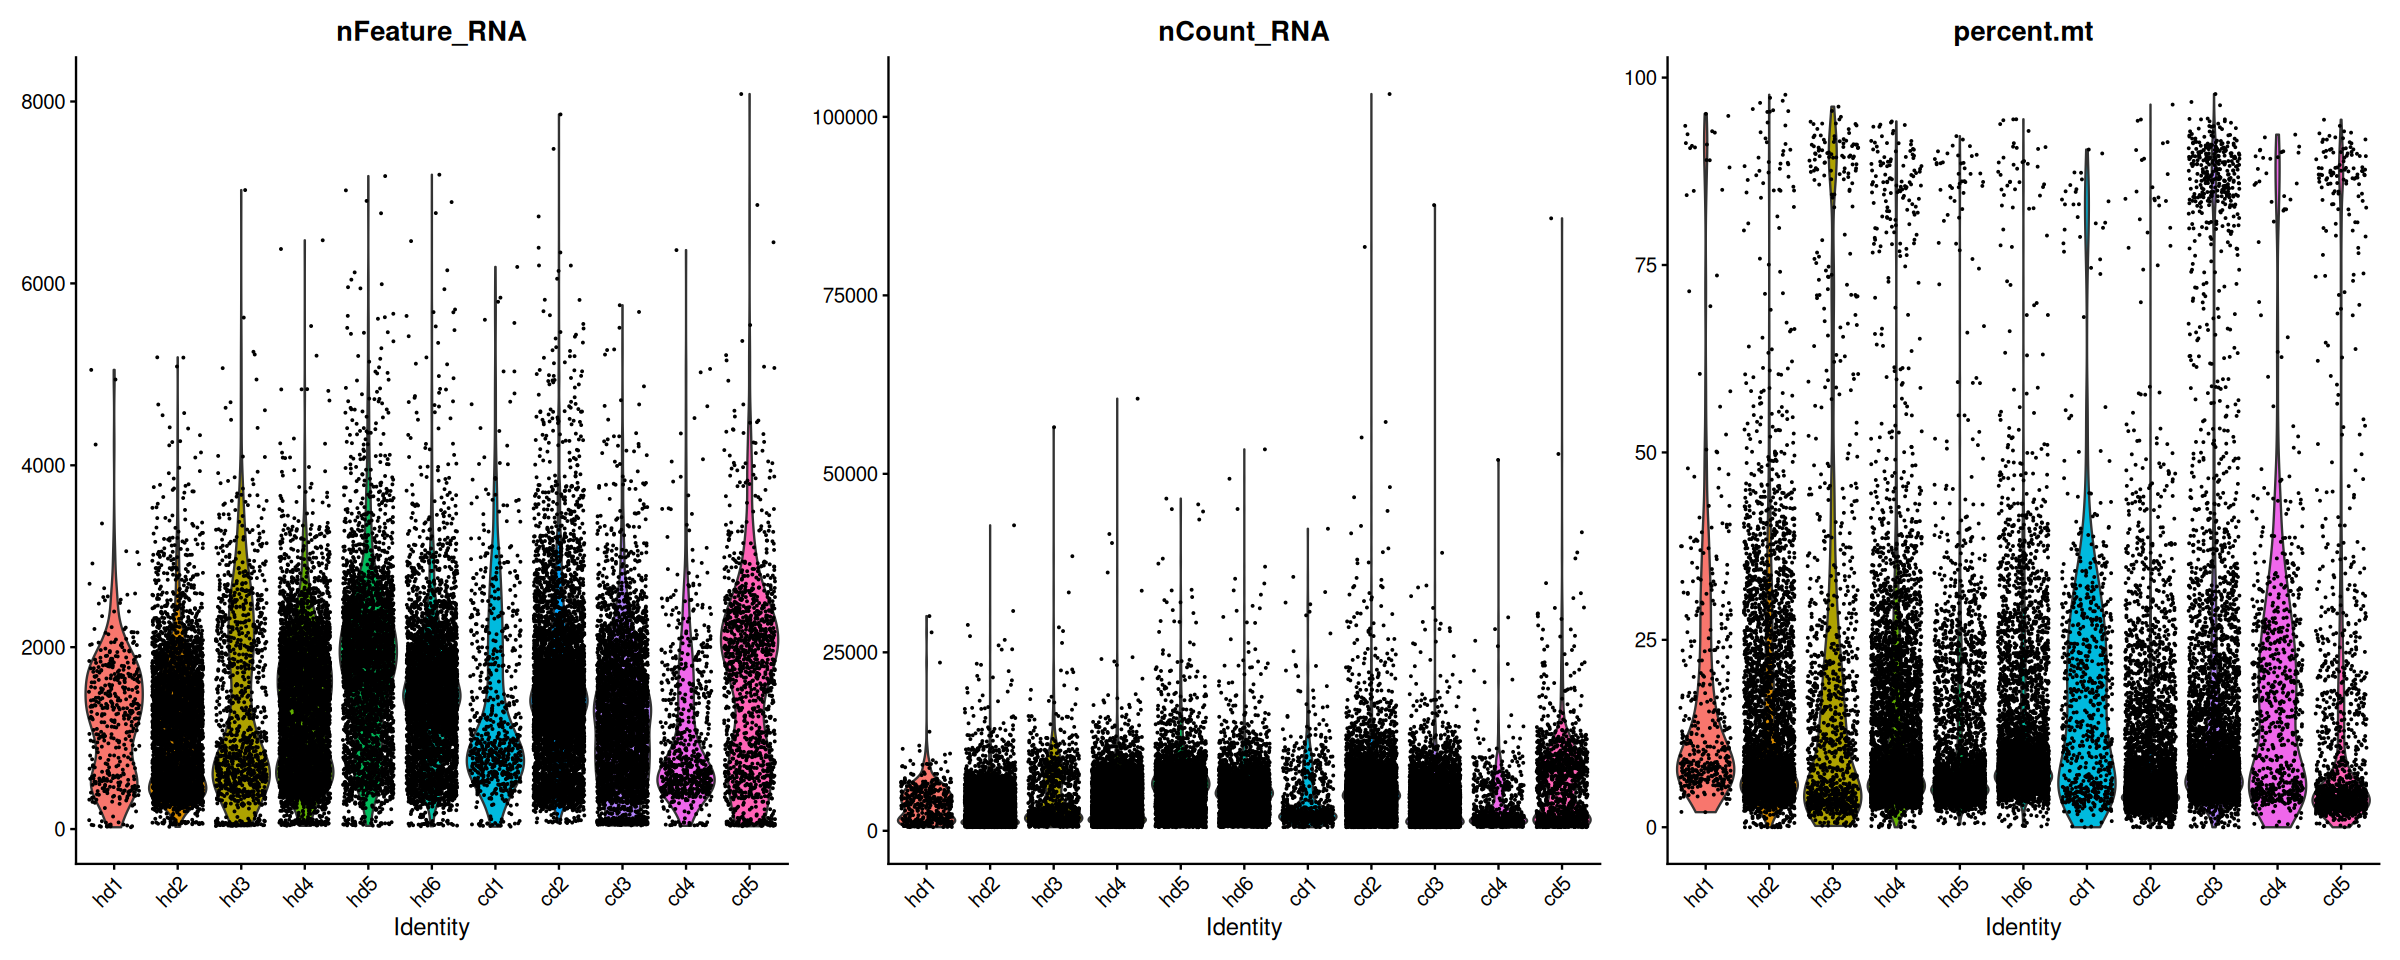

In [16]:
# compute the percent of mithochondrial genes
combined[["percent.mt"]] <- PercentageFeatureSet(combined, pattern = "^mt-|^MT-|^Mt") 

options(repr.plot.width = 20, repr.plot.height = 8)
VlnPlot(combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


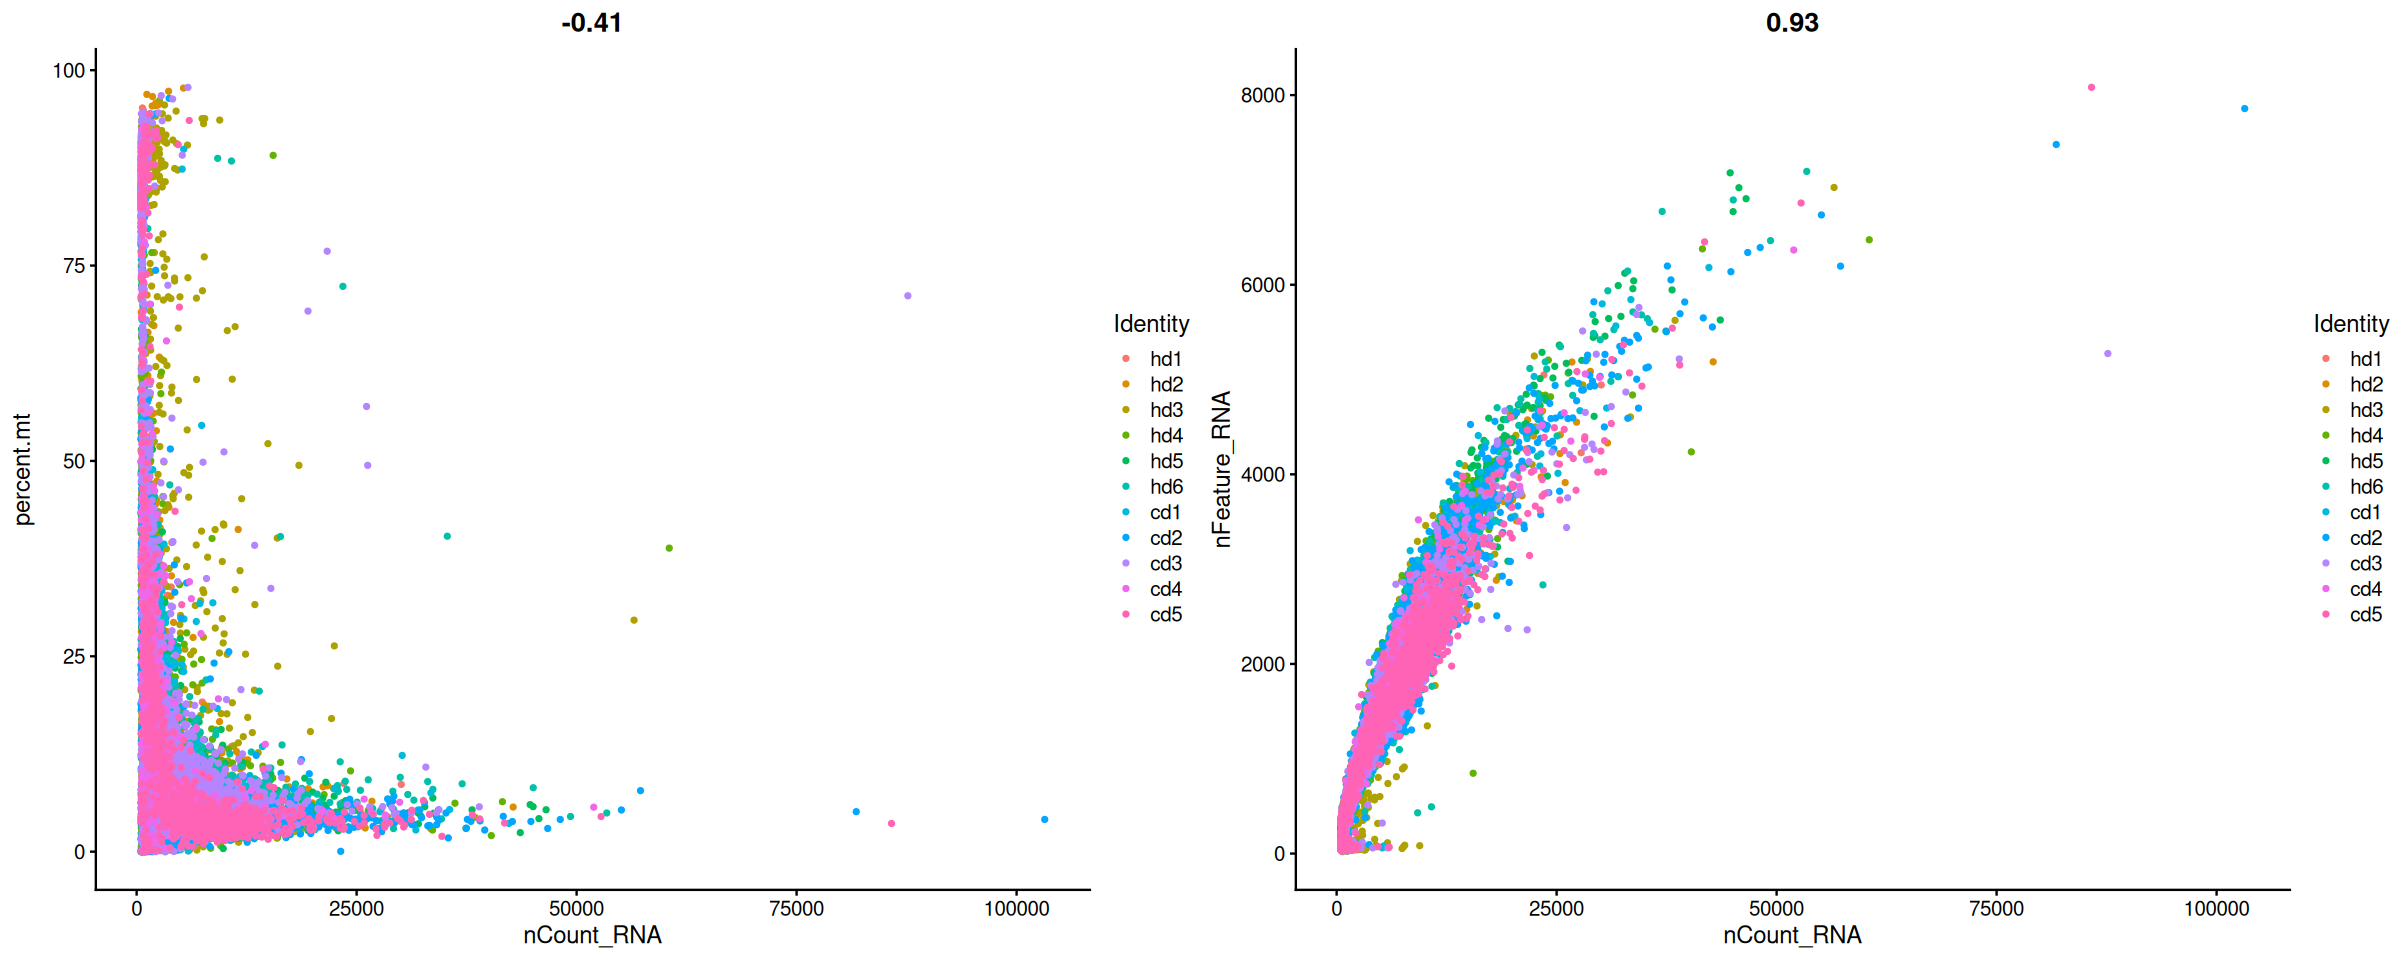

In [17]:
plot1 <- FeatureScatter(combined, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(combined, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

options(repr.plot.width = 20, repr.plot.height = 8)
CombinePlots(plots = list(plot1, plot2))

In [18]:
# Compute summary statistics
summary(combined@meta.data)

  orig.ident          nCount_RNA      nFeature_RNA     status         
 Length:33121       Min.   :   500   Min.   :  20   Length:33121      
 Class :character   1st Qu.:  2031   1st Qu.: 777   Class :character  
 Mode  :character   Median :  4502   Median :1370   Mode  :character  
                    Mean   :  4997   Mean   :1416                     
                    3rd Qu.:  6639   3rd Qu.:1872                     
                    Max.   :103197   Max.   :8082                     
   percent.mt    
 Min.   : 0.000  
 1st Qu.: 4.717  
 Median : 7.050  
 Mean   :13.202  
 3rd Qu.:15.227  
 Max.   :97.806  

In [19]:
RESOLUTION = 0.3

In [20]:
combined <- NormalizeData(combined) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose = FALSE)

combined <- RunHarmony(combined, group.by.vars = "orig.ident")

Normalizing layer: counts.hd1.1

Normalizing layer: counts.hd2.1

Normalizing layer: counts.hd3.1

Normalizing layer: counts.hd4.1

Normalizing layer: counts.hd5.1

Normalizing layer: counts.hd6.1

Normalizing layer: counts.cd1.2

Normalizing layer: counts.cd2.2

Normalizing layer: counts.cd3.2

Normalizing layer: counts.cd4.2

Normalizing layer: counts.cd5.2

Finding variable features for layer counts.hd1.1

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.3493”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.5314e-14”
Finding variable features for layer counts.hd2.1

Finding variable features for layer counts.hd3.1

Finding variable features for layer counts.hd4.1

Finding variable features for layer counts.hd5.1

Finding varia

In [21]:
combined <- RunUMAP(combined, reduction = "harmony", dims = 1:30)
combined <- RunTSNE(combined, reduction = "harmony", dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
00:49:20 UMAP embedding parameters a = 0.9922 b = 1.112

00:49:20 Read 33121 rows and found 30 numeric columns

00:49:20 Using Annoy for neighbor search, n_neighbors = 30

00:49:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:49:22 Writing NN index file to temp file /tmp/RtmpDlzjrE/file99bc4fd371ed

00:49:22 Searching Annoy index using 1 thread, search_k = 3000

00:49:29 Annoy recall = 100%

00:49:29 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [22]:
Reductions(combined)

[1] "pca"     "harmony" "umap"    "tsne"

In [23]:
RESOLUTION = 0.3

In [24]:
combined <- FindNeighbors(combined, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution = RESOLUTION)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 33121
Number of edges: 1169489

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9140
Number of communities: 14
Elapsed time: 6 seconds


In [25]:
# save.image("cd.v1.RData")

In [26]:
head(combined@meta.data,3)
print("number of clusters")
table(combined@meta.data$seurat_clusters)

orig.ident nCount_RNA nFeature_RNA status
healthy_hd1_AAAGAACTCCCTTCCC-1 hd1        1017       452          hd    
healthy_hd1_AAAGGATTCATGAGAA-1 hd1         642       138          hd    
healthy_hd1_AAAGGTACAACCGTGC-1 hd1        1418       560          hd    
                               percent.mt RNA_snn_res.0.3 seurat_clusters
healthy_hd1_AAAGAACTCCCTTCCC-1 34.61160   0               0              
healthy_hd1_AAAGGATTCATGAGAA-1 71.49533   0               0              
healthy_hd1_AAAGGTACAACCGTGC-1 40.55007   0               0

[1] "number of clusters"



   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
8225 6930 6239 3402 3331 2168  741  462  383  336  333  280  163  128 

[1] "Visualization using PCA :"


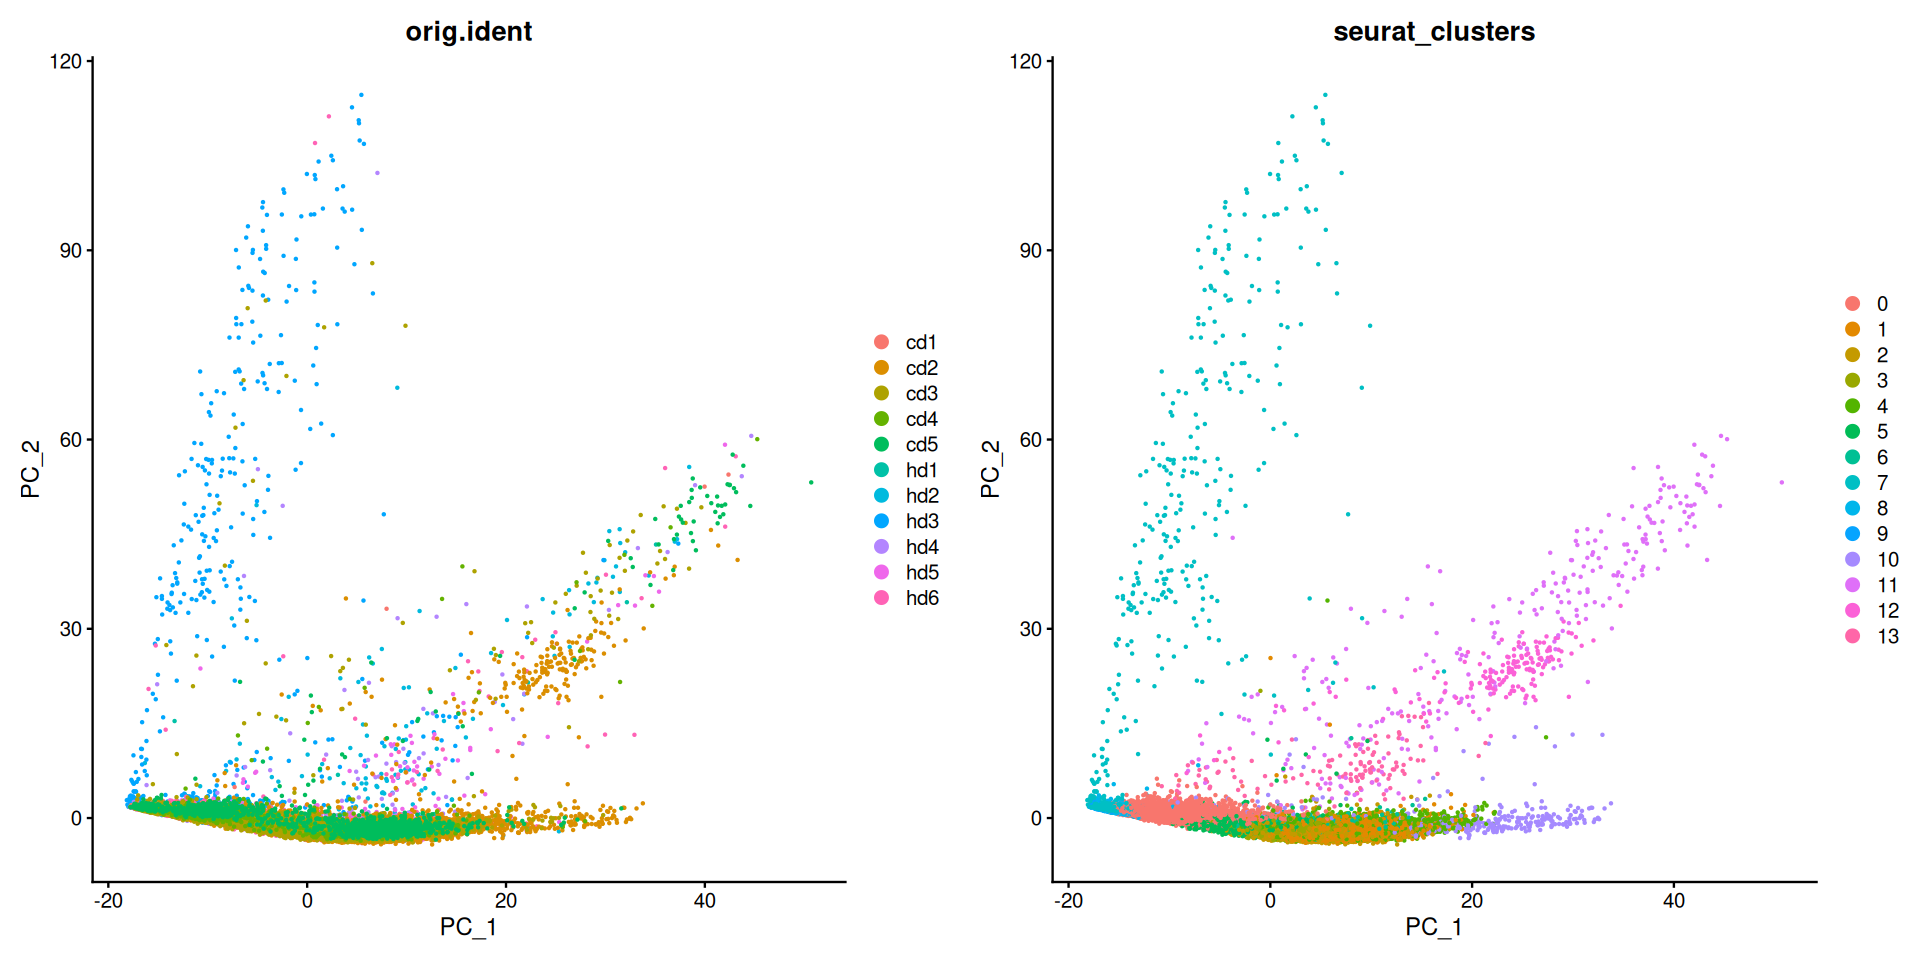

In [27]:
print("Visualization using PCA :")
options(repr.plot.width = 16, repr.plot.height = 8)
p1 <- DimPlot(combined, reduction = "pca", group.by = "orig.ident")
p2 <- DimPlot(combined, reduction = "pca", group.by = c("seurat_clusters"))
plot_grid(p1, p2)

# print("Visualization using HARMONY :")
# options(repr.plot.width = 22, repr.plot.height = 8)
# p1 <- DimPlot(combined, reduction = "harmony", group.by = "orig.ident")
# p2 <- DimPlot(combined, reduction = "harmony", group.by = "seurat_clusters")
# plot_grid(p1, p2)

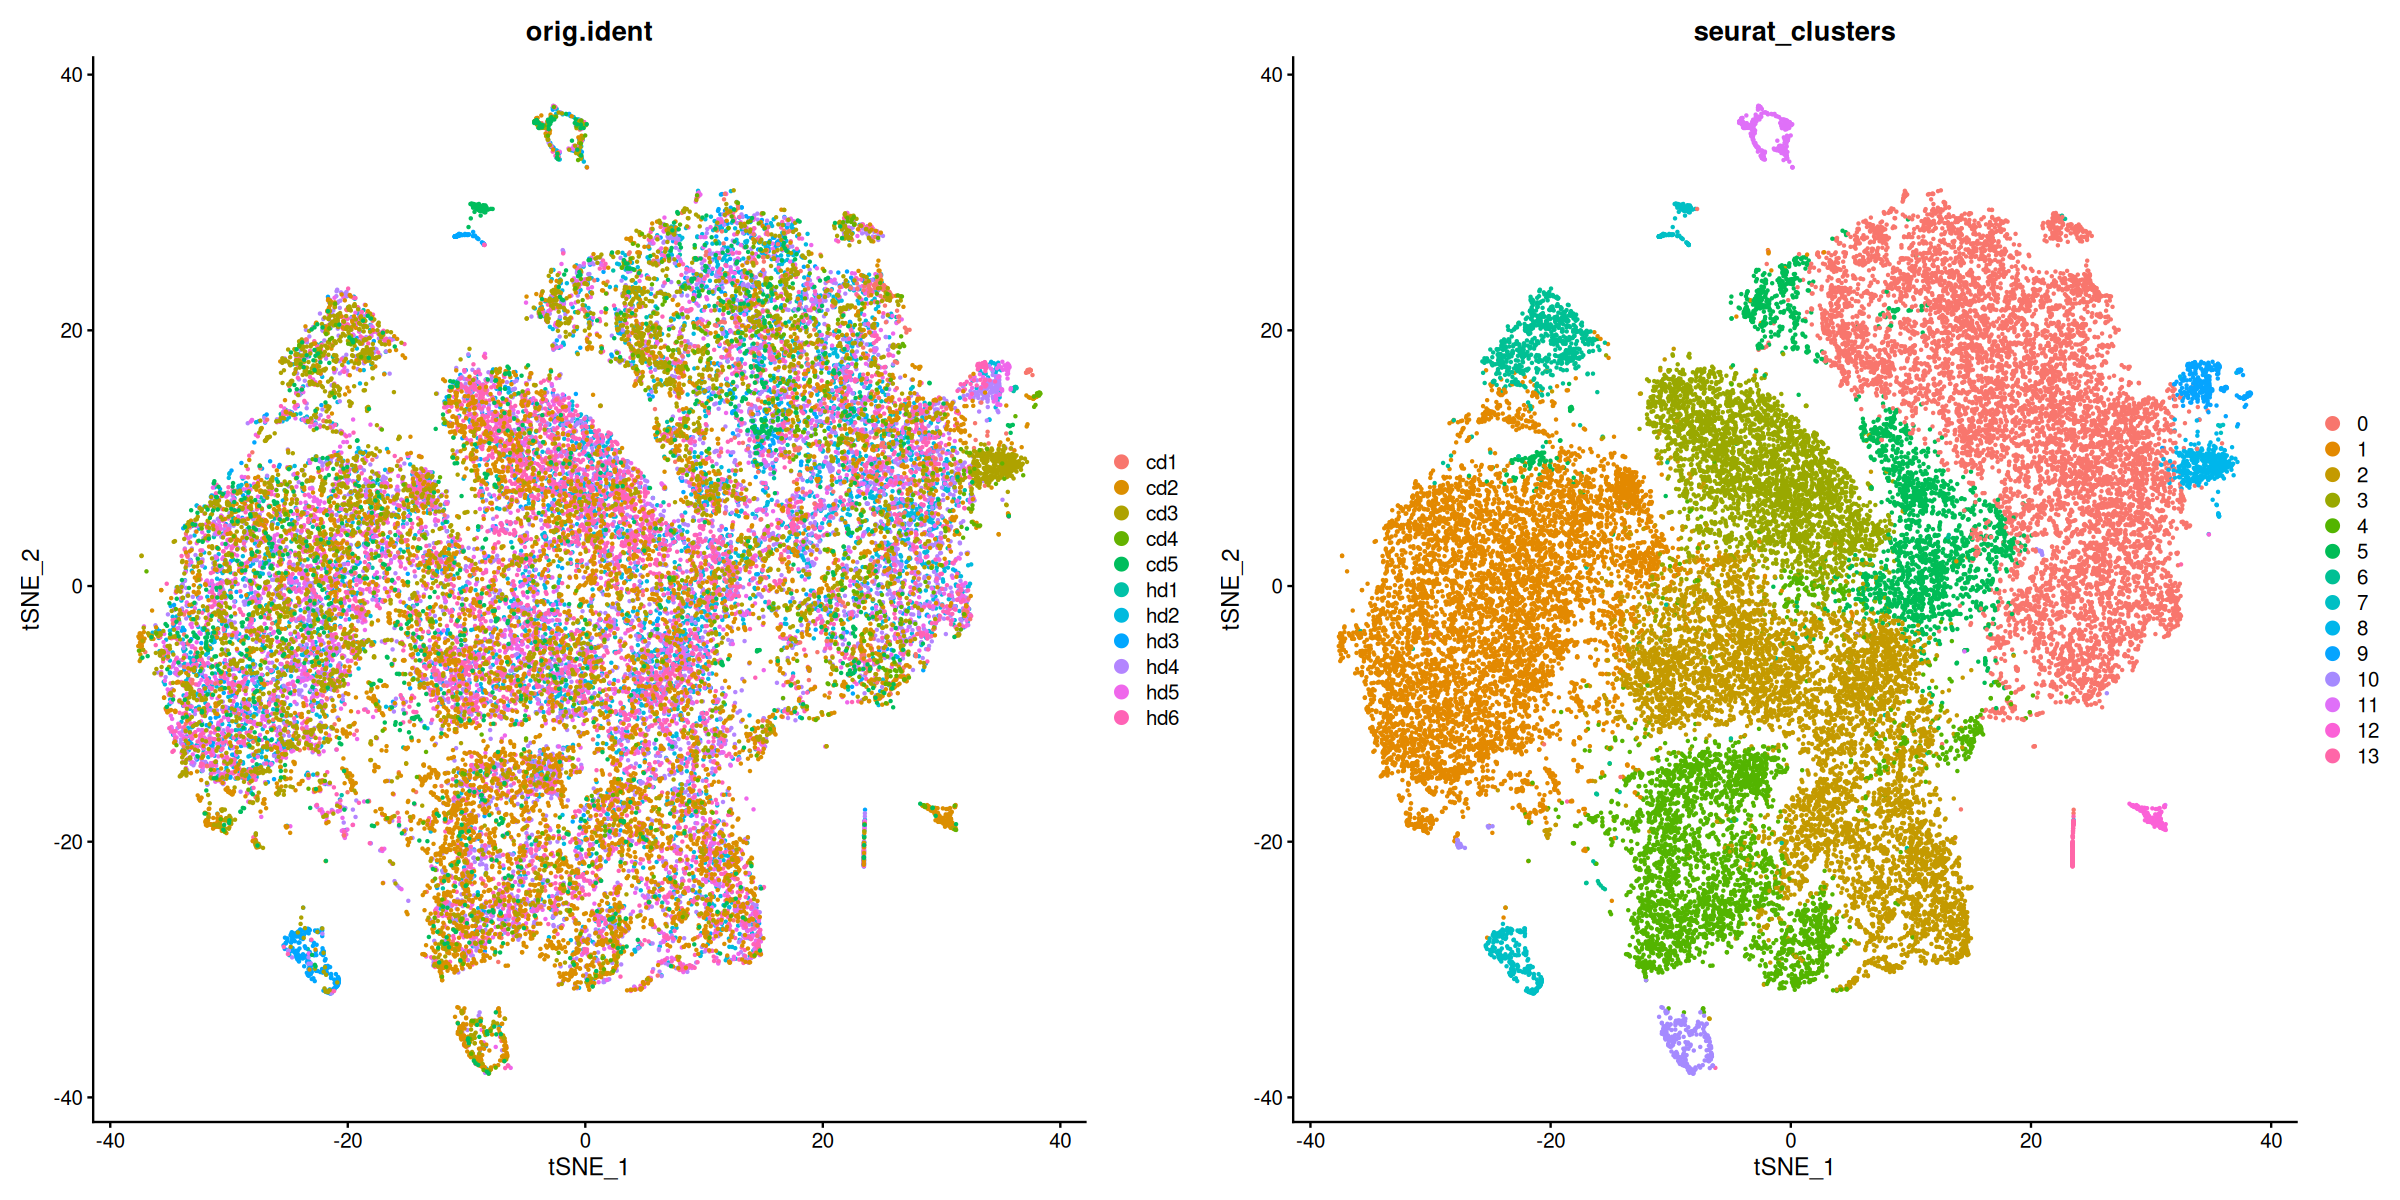

In [28]:
# Visualization using tSNE :

options(repr.plot.width = 20, repr.plot.height = 10)
p1 <- DimPlot(combined, reduction = "tsne", group.by = "orig.ident")
p2 <- DimPlot(combined, reduction = "tsne", group.by = "seurat_clusters")
plot_grid(p1, p2)

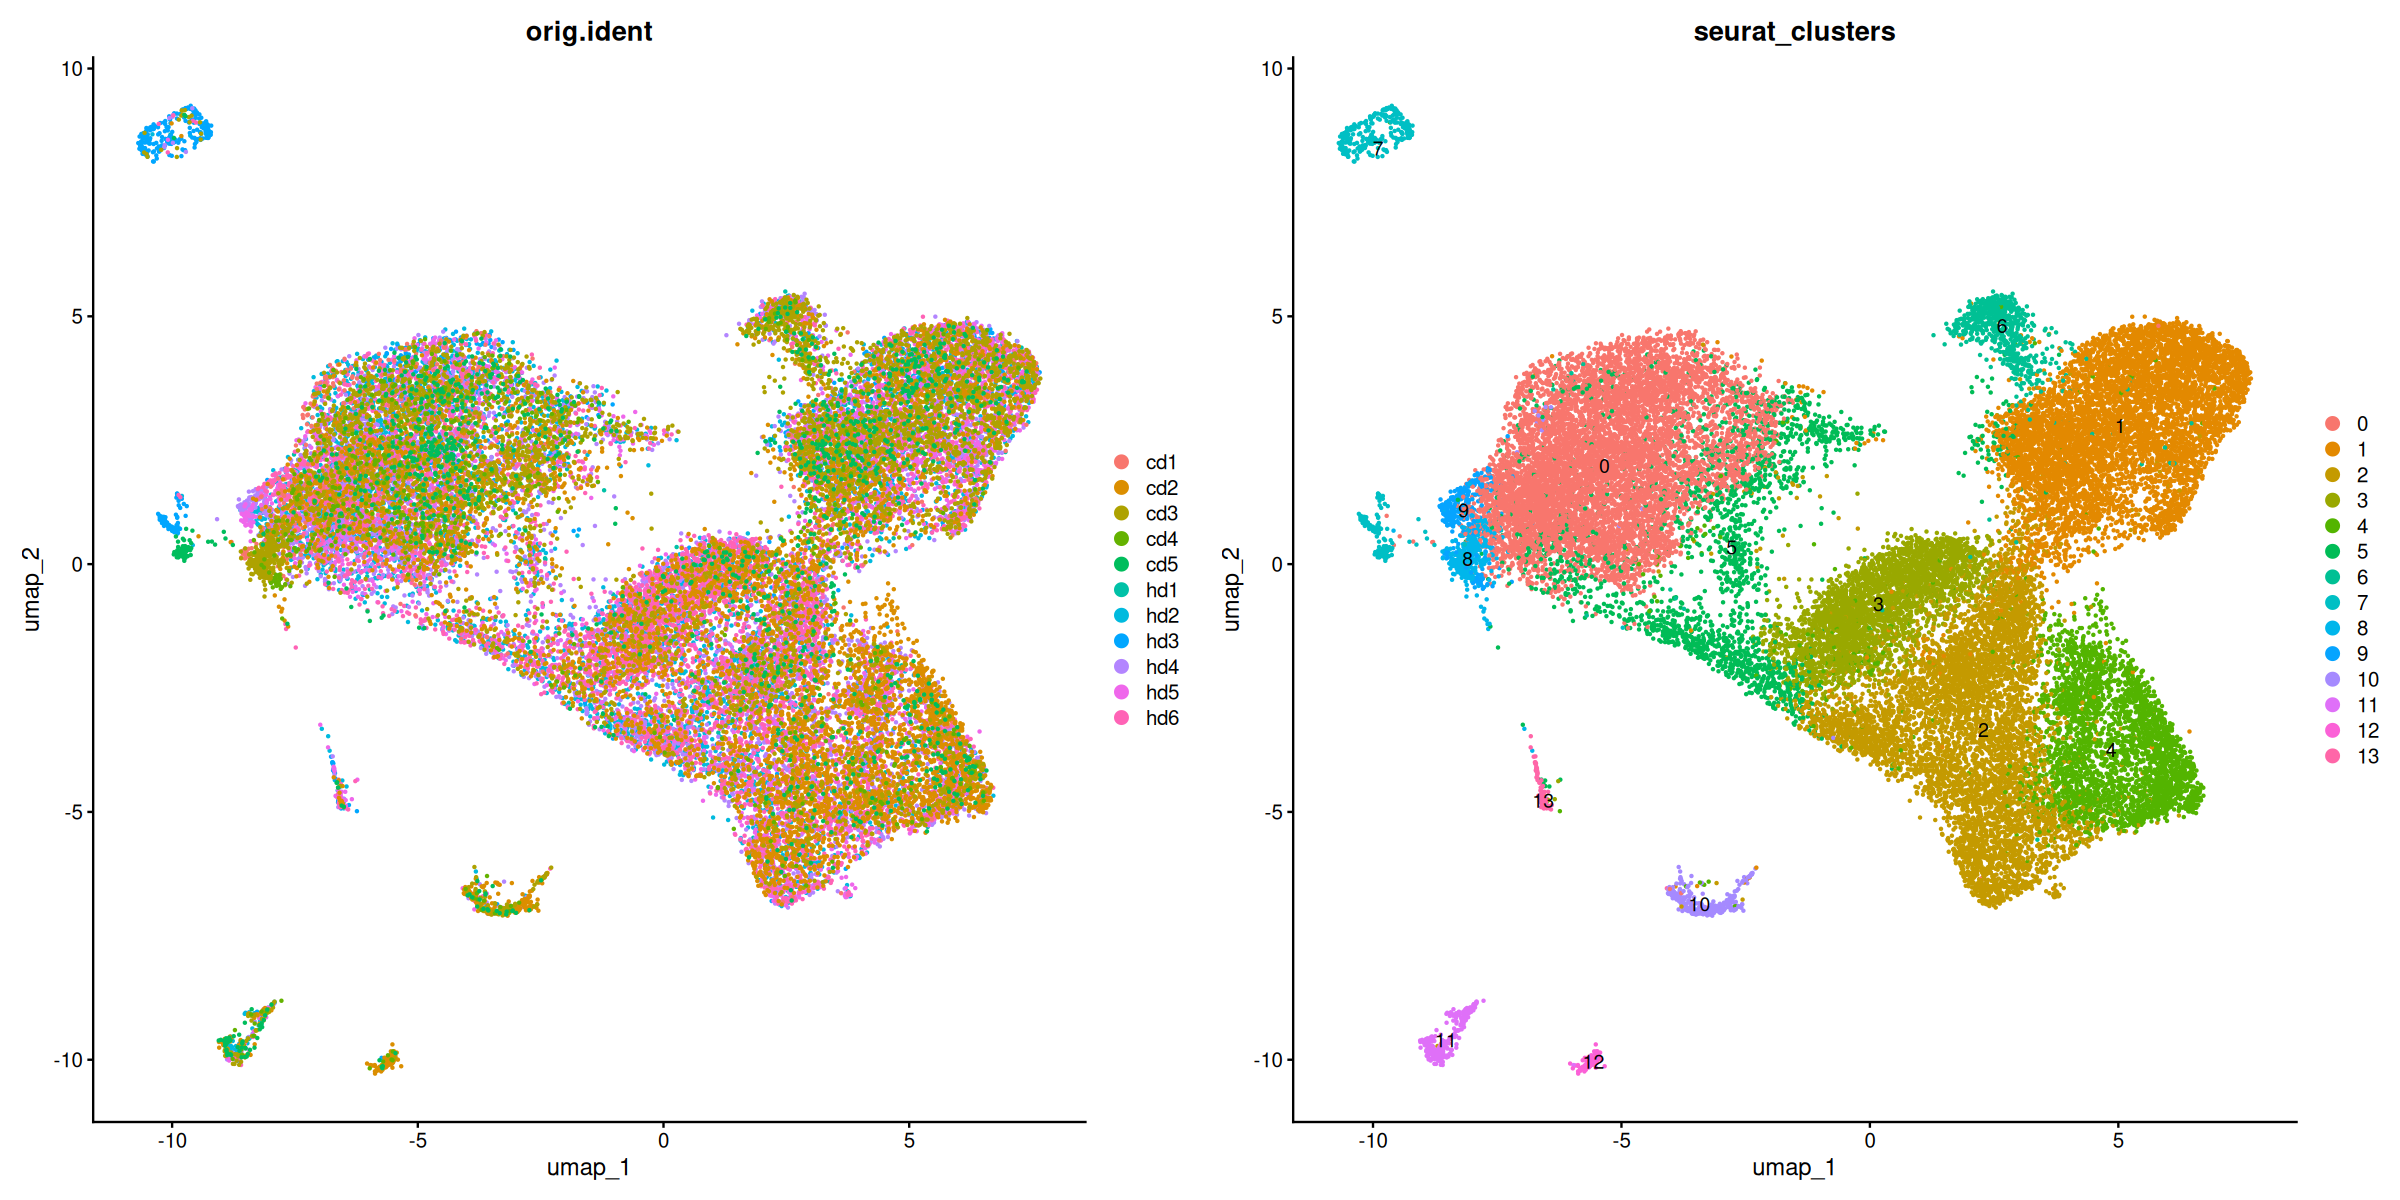

In [29]:
# Visualization using UMAP :

options(repr.plot.width = 20, repr.plot.height = 10)
p1 <- DimPlot(combined, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(combined, reduction = "umap", group.by = "seurat_clusters", label=TRUE)
plot_grid(p1, p2)

[1] "T-reg specific markers"


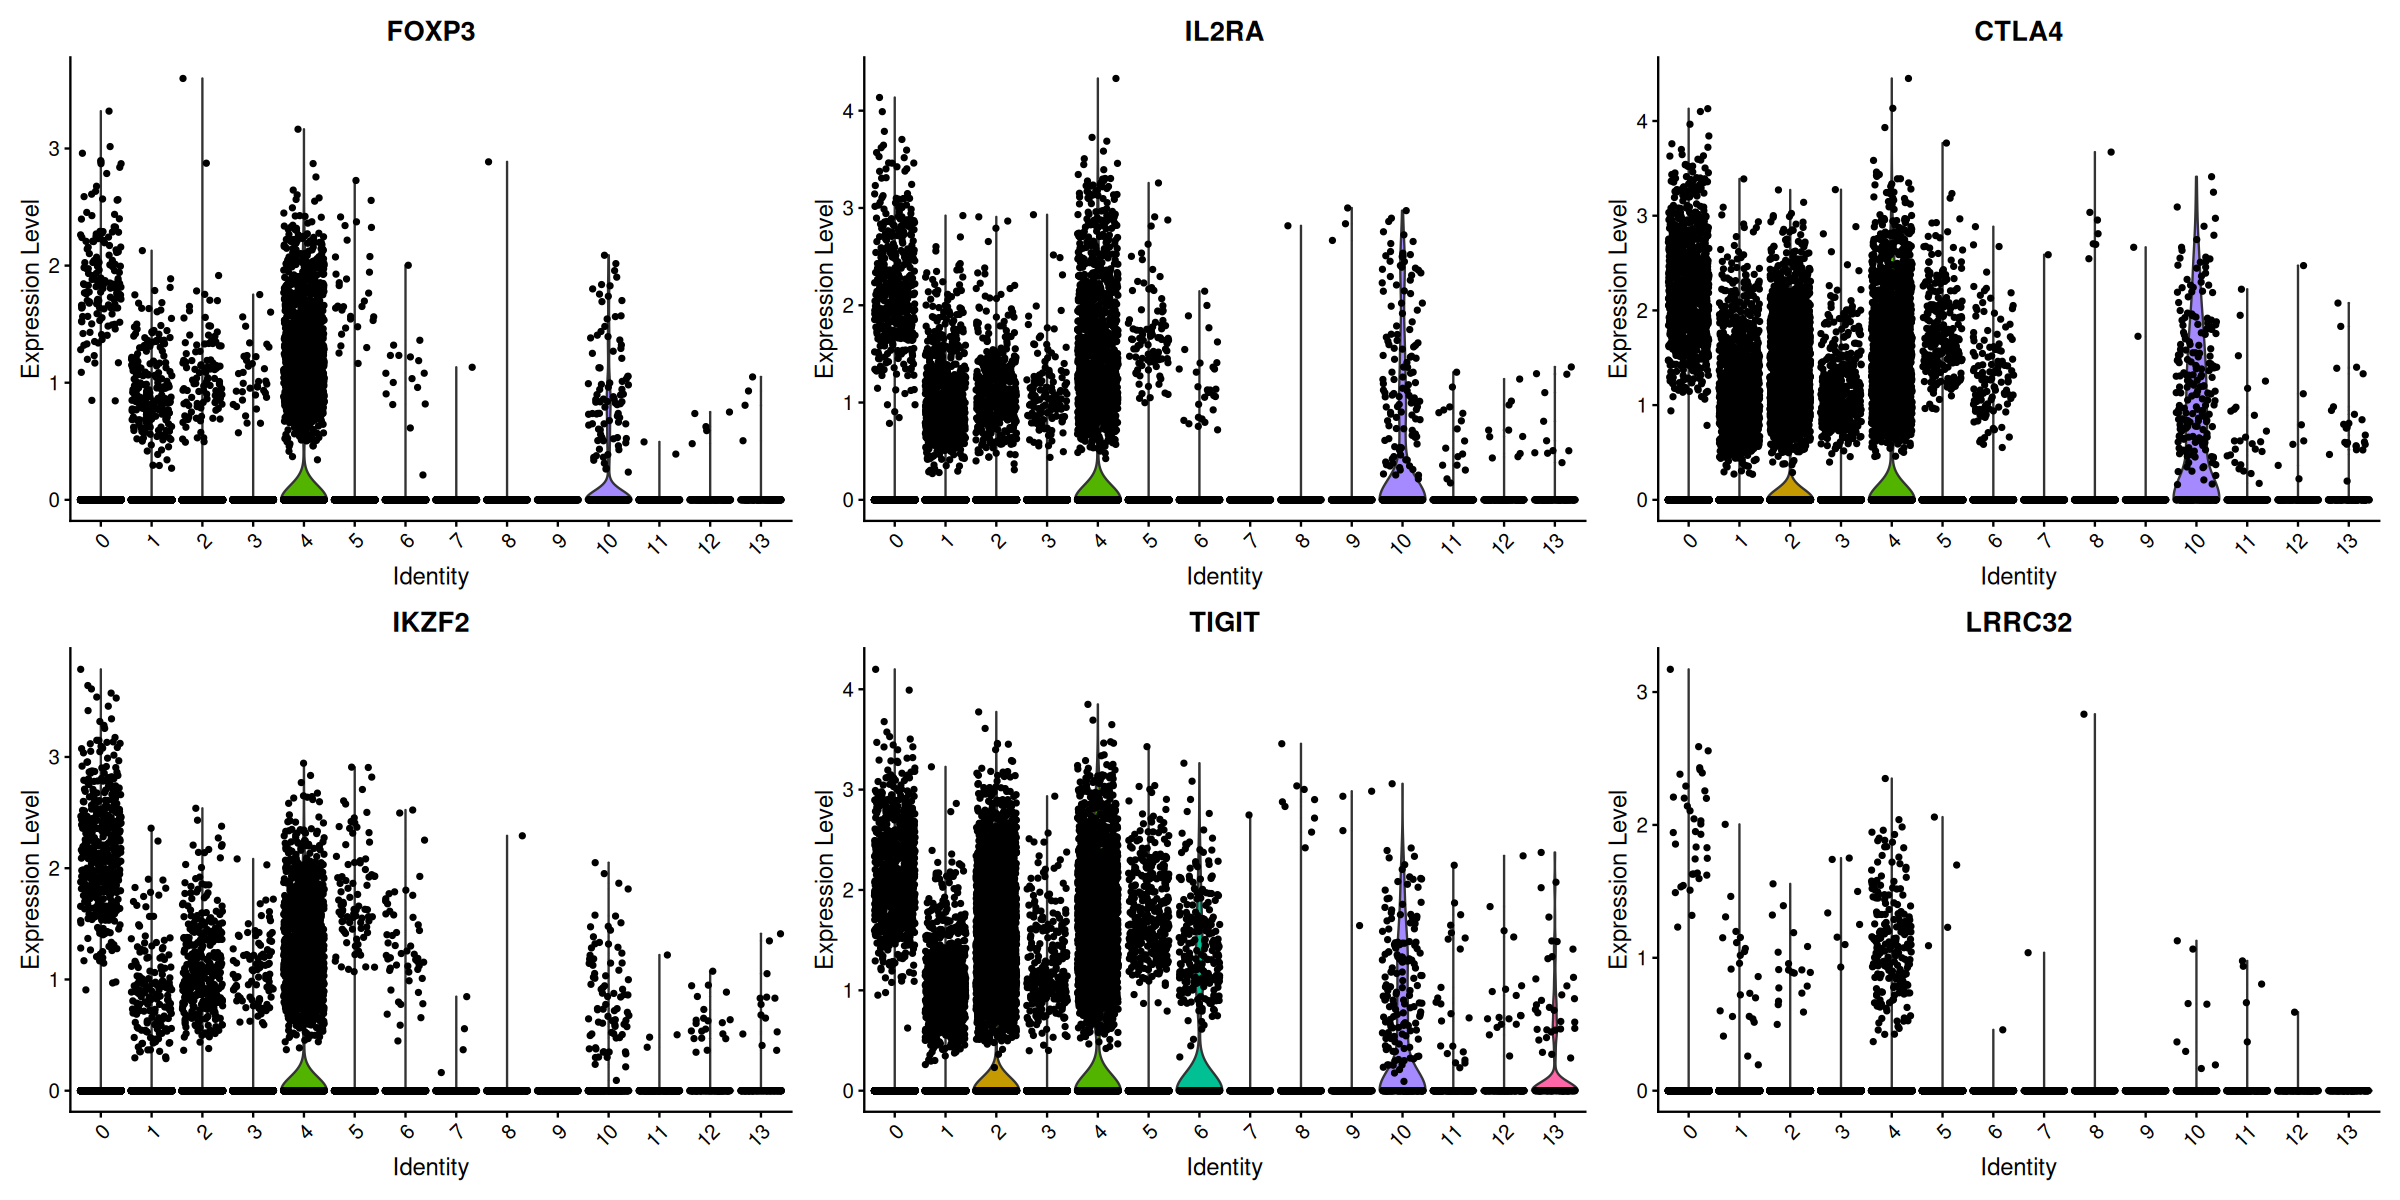

In [30]:
print("T-reg specific markers")

VlnPlot(combined, features = c("FOXP3", "IL2RA", "CTLA4", "IKZF2", "TIGIT", "LRRC32"), pt.size = 1)

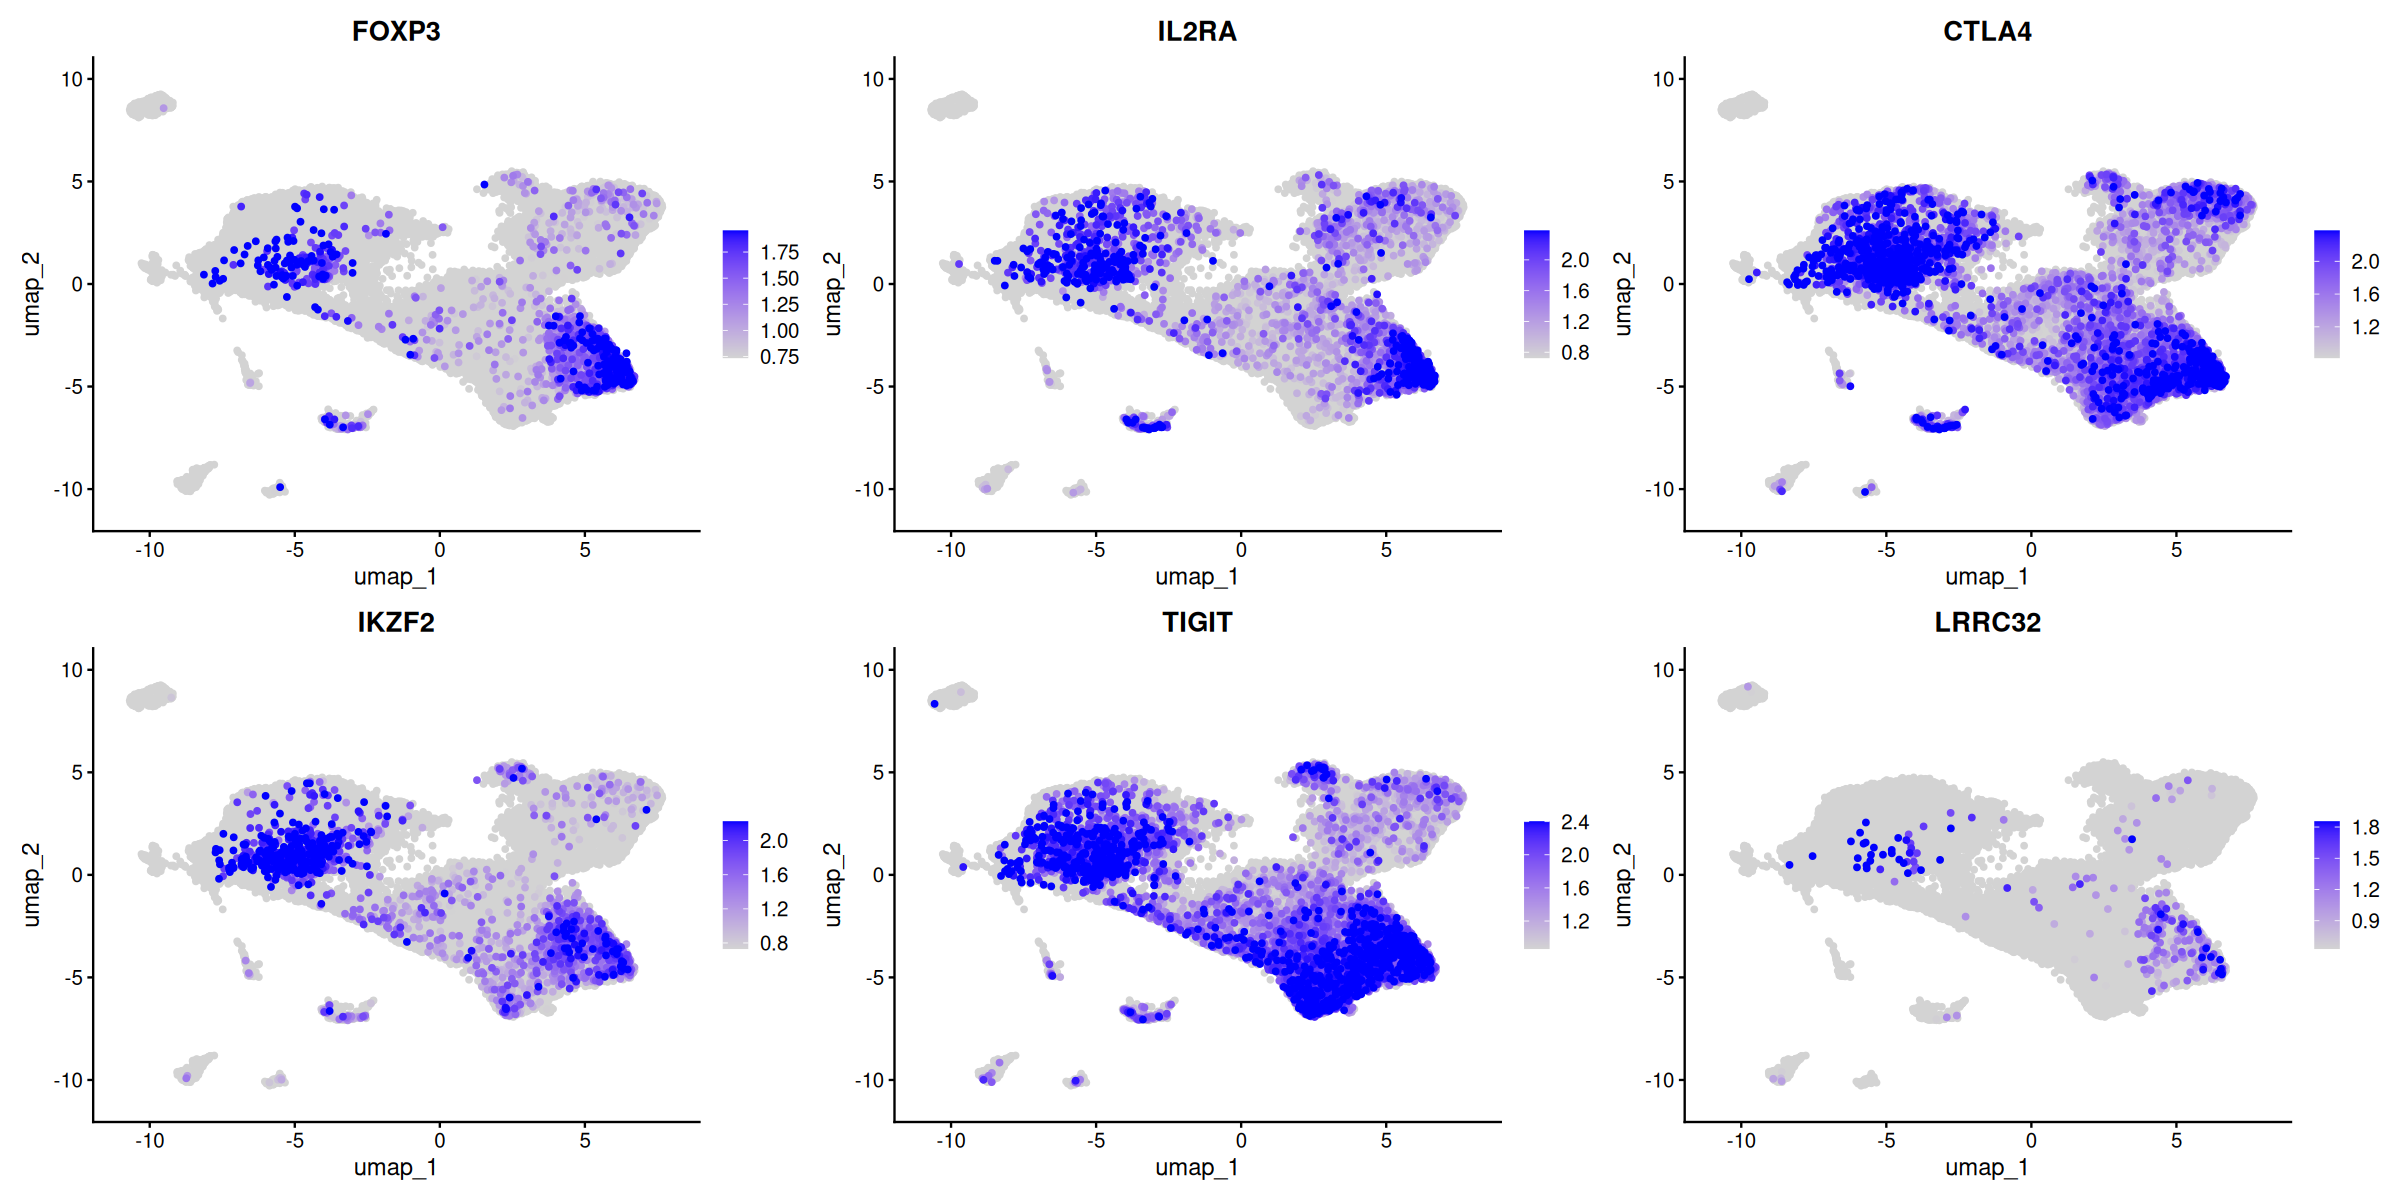

In [31]:
fp <- FeaturePlot(
  combined,
  features = c("FOXP3", "IL2RA", "CTLA4", "IKZF2", "TIGIT", "LRRC32"),
  reduction = "umap",
  pt.size = 1,
  order = TRUE,
  min.cutoff = "q10",
  max.cutoff = "q90"
)

fp[[1]] + fp[[2]] + fp[[3]] +
fp[[4]] + fp[[5]] + fp[[6]] +
          plot_layout(ncol = 3)

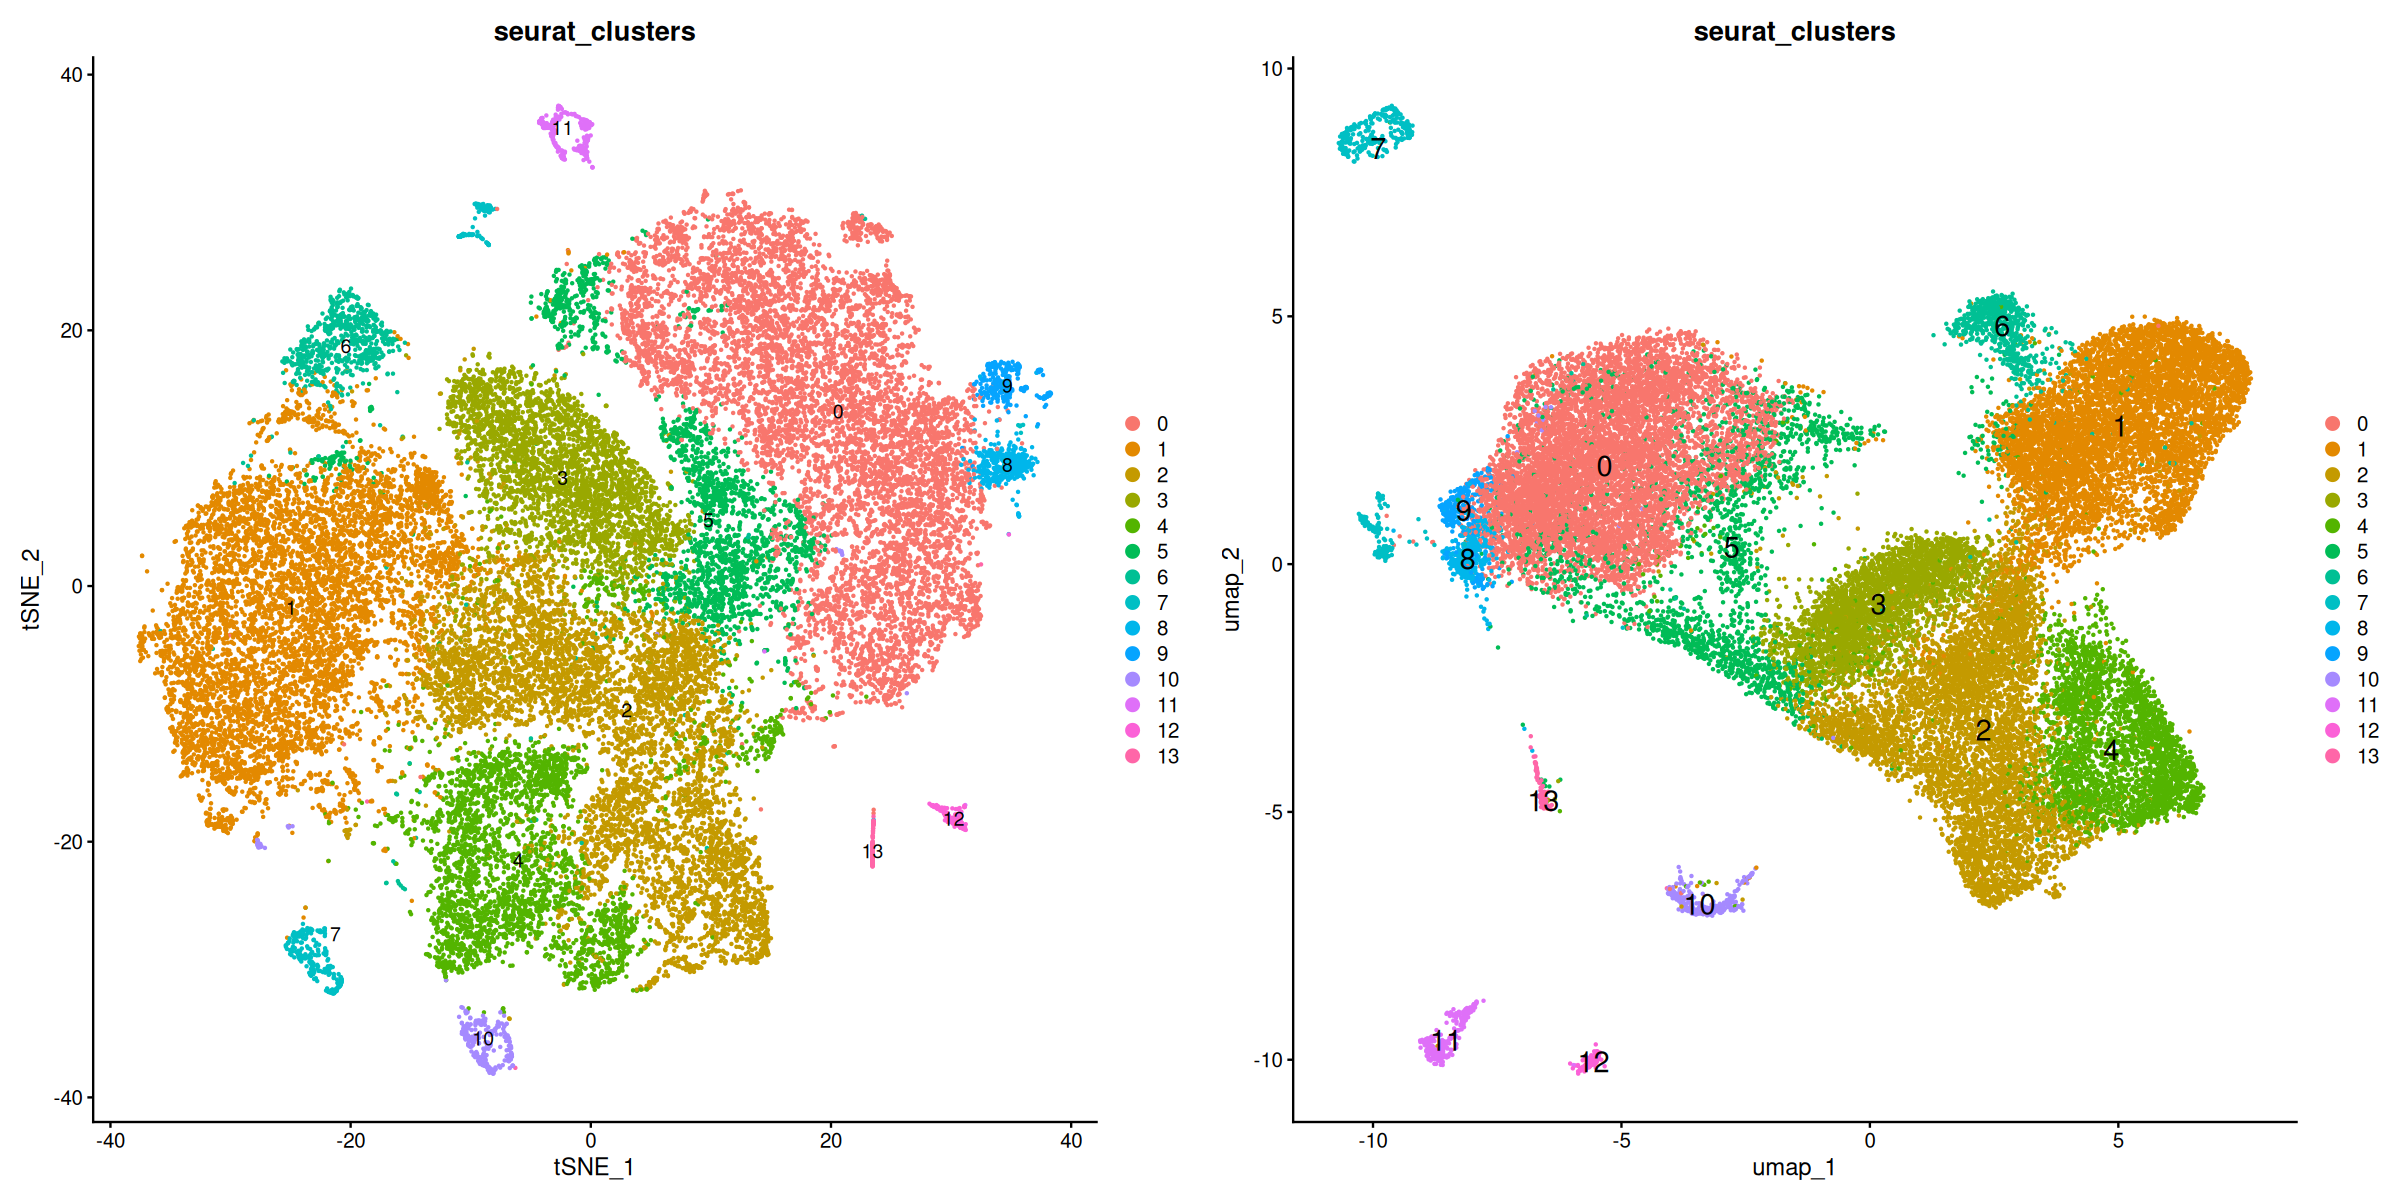

In [32]:
options(repr.plot.width = 20, repr.plot.height = 10)
p1 <- DimPlot(combined, reduction = "tsne", group.by = "seurat_clusters", label = TRUE)
p2 <- DimPlot(combined, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 6)
plot_grid(p1, p2)

In [33]:
head(combined@meta.data, 2)

orig.ident nCount_RNA nFeature_RNA status
healthy_hd1_AAAGAACTCCCTTCCC-1 hd1        1017       452          hd    
healthy_hd1_AAAGGATTCATGAGAA-1 hd1         642       138          hd    
                               percent.mt RNA_snn_res.0.3 seurat_clusters
healthy_hd1_AAAGAACTCCCTTCCC-1 34.61160   0               0              
healthy_hd1_AAAGGATTCATGAGAA-1 71.49533   0               0

In [34]:
print("Based on the expression of markers such as FOXP3, IL2RA, CTLA4, IKZF2, TIGIT, and LRRC32, we infer that cluster 4 likely 
      represents regulatory T cells (Tregs). However, a more comprehensive analysis should include automated cell type annotation 
      methods such as SingleR, CellTypist, Azimuth, or scmap for greater confidence.")

[1] "Based on the expression of markers such as FOXP3, IL2RA, CTLA4, IKZF2, TIGIT, and LRRC32, we infer that cluster 4 likely \n      represents regulatory T cells (Tregs). However, a more comprehensive analysis should include automated cell type annotation \n      methods such as SingleR, CellTypist, Azimuth, or scmap for greater confidence."


In [35]:
print("Computing the differential expression bewteen HD and CD only for cluster 4")

[1] "Computing the differential expression bewteen HD and CD only for cluster 4"


In [36]:
# selecting Cluster 4
Idents(combined) <- "seurat_clusters"

cluster4 <- WhichCells(combined, idents = "4")
cluster4o <- subset(combined, cells = cluster4)
Idents(cluster4o) <- "status"

cluster4o <- JoinLayers(cluster4o)
# ident.1 = "cd" is the test group
# ident.2 = "hd" is the reference group
cluster4_markers <- FindMarkers(
  cluster4o,
  ident.1 = "cd",
  ident.2 = "hd",
  min.pct = 0.1,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

In [37]:
head(cluster4_markers, 4)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    
RPS4Y1     0.00000e+00 -3.891687  0.076 0.751  0.000000e+00
PLCG2      0.00000e+00 -2.346352  0.381 0.914  0.000000e+00
RPS26      0.00000e+00  1.802465  0.994 0.883  0.000000e+00
MTRNR2L12 1.32076e-288 -1.575398  0.899 0.991 4.834112e-284

In [38]:
# Define significance threshold and subset the significant genes

sig <- 0.05
logfc <- 0.25

sig_genes <- subset(cluster4_markers, p_val_adj < sig & abs(avg_log2FC) > logfc)
up <- sum(sig_genes$avg_log2FC > logfc)
down <- sum(sig_genes$avg_log2FC < -logfc)

cat("Significantly upregulated genes in cd vs hd:", up, "\n")
cat("Significantly downregulated genes in cd vs hd:", down, "\n")

# cat("top 10 up-regulated genes")
head(sig_genes[order(-sig_genes$avg_log2FC), ], 5)

# cat("top 10 down-regulated genes")
head(sig_genes[order(sig_genes$avg_log2FC), ], 5)

Significantly upregulated genes in cd vs hd: 745 
Significantly downregulated genes in cd vs hd: 684 


p_val        avg_log2FC pct.1 pct.2 p_val_adj   
HPGD      4.618615e-43 4.987122   0.152 0.011 1.690459e-38
SOX4      2.819942e-35 3.785317   0.145 0.019 1.032127e-30
LINC02195 1.167947e-51 3.702479   0.186 0.015 4.274802e-47
TWIST1    1.743625e-40 3.611255   0.175 0.027 6.381841e-36
NPDC1     2.232786e-63 3.435361   0.234 0.024 8.172221e-59

p_val         avg_log2FC pct.1 pct.2 p_val_adj   
PRKY    5.995427e-52 -3.892658  0.007 0.131 2.194386e-47
RPS4Y1  0.000000e+00 -3.891687  0.076 0.751 0.000000e+00
KDM5D   3.053456e-48 -3.584745  0.019 0.152 1.117596e-43
USP9Y  4.155571e-101 -3.488671  0.038 0.301 1.520980e-96
UTY     6.663854e-71 -3.286267  0.030 0.225 2.439037e-66

In [39]:
# re-order the table print the results

sig_genes$gene <- rownames(sig_genes)
head(sig_genes)

sig_genes$direction <- ifelse(sig_genes$avg_log2FC > 0, "up sj", "down sj")
sig_table <- sig_genes[, c("gene", "avg_log2FC", "p_val_adj", "pct.1", "pct.2", "direction")]
sig_table <- sig_table[order(sig_table$avg_log2FC, decreasing = TRUE), ]

write.csv(sig_table, "cluster4_DE_genes_cd_vs_hd.csv", row.names = FALSE)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     gene     
RPS4Y1     0.000000e+00 -3.891687  0.076 0.751  0.000000e+00 RPS4Y1   
PLCG2      0.000000e+00 -2.346352  0.381 0.914  0.000000e+00 PLCG2    
RPS26      0.000000e+00  1.802465  0.994 0.883  0.000000e+00 RPS26    
MTRNR2L12 1.320760e-288 -1.575398  0.899 0.991 4.834112e-284 MTRNR2L12
FTH1      3.343597e-201  1.208261  0.995 0.979 1.223790e-196 FTH1     
XIST      4.658655e-195  2.341236  0.679 0.117 1.705114e-190 XIST

In [40]:
print("The number of differentially expressed genes in cluster 4 bewteen Healthy Donors and Crohn Patients is :")
dim(sig_genes)

[1] "The number of differentially expressed genes in cluster 4 bewteen Healthy Donors and Crohn Patients is :"


[1] 1429    7

In [41]:
print(paste("Over-representation and Gene Set Enrichment analysis for", nrow(sig_genes), "genes"))

[1] "Over-representation and Gene Set Enrichment analysis for 1429 genes"


In [42]:
print("The analysis with the package clusterprofiler")

[1] "The analysis with the package clusterprofiler"


In [43]:
library(clusterProfiler)
library(org.Hs.eg.db) 
library(GO.db)         
library(DO.db)         
library(KEGGREST)      
library(ReactomePA)    
library(enrichplot)    
library(dplyr)
library(msigdbr)
library(msigdb)
library(msigdf)
library(msigdbdf)



clusterProfiler v4.14.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, b

In [44]:
gene_list = sig_genes$gene
# head(gene_list)
filtered = sig_genes
# head(filtered)

In [45]:
# Convert gene names to Entrez IDs
gene_ids <- bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)
# head(gene_ids, 2)
gene_list_merged <- merge(gene_ids, filtered, by.x = "SYMBOL", by.y = "gene")
# head(gene_list_merged, 2)
fin_name = "cluster4_DE_genes_cd_vs_hd.clusterprofiler"

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“5.6% of input gene IDs are fail to map...”


In [46]:
gene_list2 <- setNames(gene_list_merged$avg_log2FC, gene_list_merged$ENTREZID)
gene_list2 <- sort(gene_list2, decreasing = TRUE)
head(gene_list2, 2)

3248     6659 
4.987122 3.785317

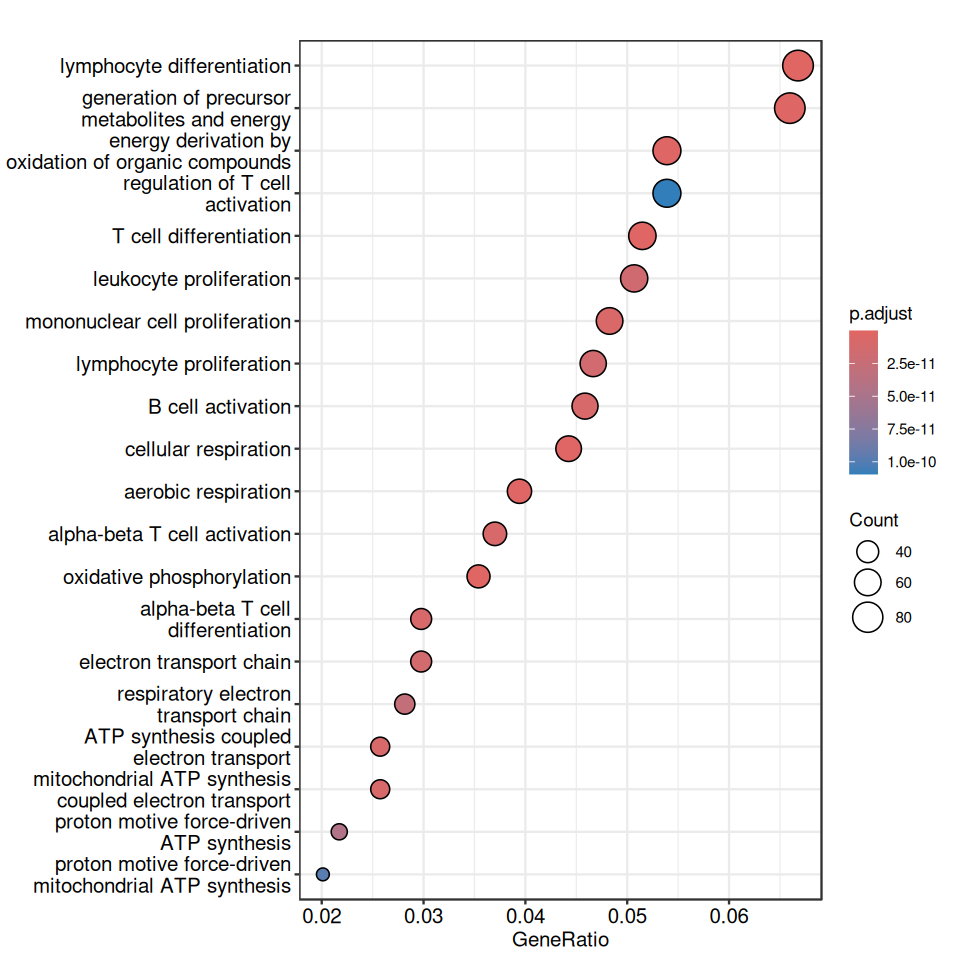

In [47]:
# GO Over-Representation Analysis

result <- tryCatch({

  ego <- enrichGO(gene          = gene_ids$ENTREZID,
                  OrgDb         = org.Hs.eg.db,
                  ont           = "BP",
                  keyType       = "ENTREZID",  
                  pAdjustMethod = "BH",
                  pvalueCutoff  = 0.05,
                  qvalueCutoff  = 1,
                  readable      = TRUE)
  
  # Save results (using the result slot for consistency)
  write.table(ego@result, file = paste0(fin_name, "_GO_OverRepresentation_Results.txt"), 
              row.names = FALSE, col.names = TRUE, quote = FALSE)
  
  png(paste0(fin_name, "_GO_OverRepresentation.png"), width = 1000, height = 800)
  print(dotplot(ego, showCategory = 20))
  dev.off()
  
  # Display plot interactively
  # print(dotplot(ego, showCategory = 20))
  
}, error = function(e) {
  cat("An error occurred in GO over-representation analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(ego, showCategory = 20))

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



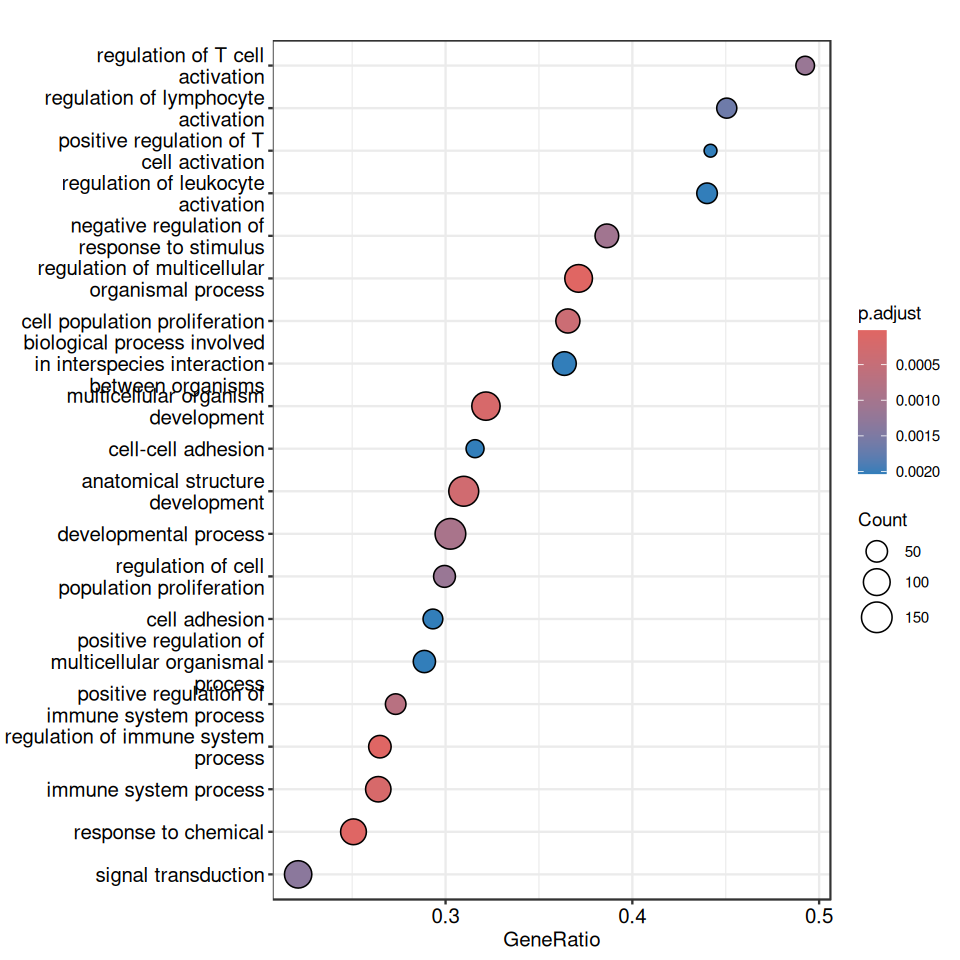

In [48]:
# GO Enrichment Analysis (GSEA)

result2 <- tryCatch({

  ego2 <- gseGO(gene = gene_list2,
                OrgDb = org.Hs.eg.db,
                keyType = "ENTREZID",  
                ont = "BP",      # Biological Process
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05)
  
  write.table(ego2@result, file = paste0(fin_name, "_GO_Enrichment_Results.txt"), 
              row.names = FALSE, col.names = TRUE, quote = FALSE)
  
  png(paste0(fin_name, "_GO_Enrichment_Plot.png"), width = 1000, height = 800)
  print(dotplot(ego2, showCategory = 20))
  dev.off()
  
  # print(dotplot(ego2, showCategory = 20))
  
}, error = function(e) {
  cat("An error occurred in GO enrichment analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(ego2, showCategory = 20))

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



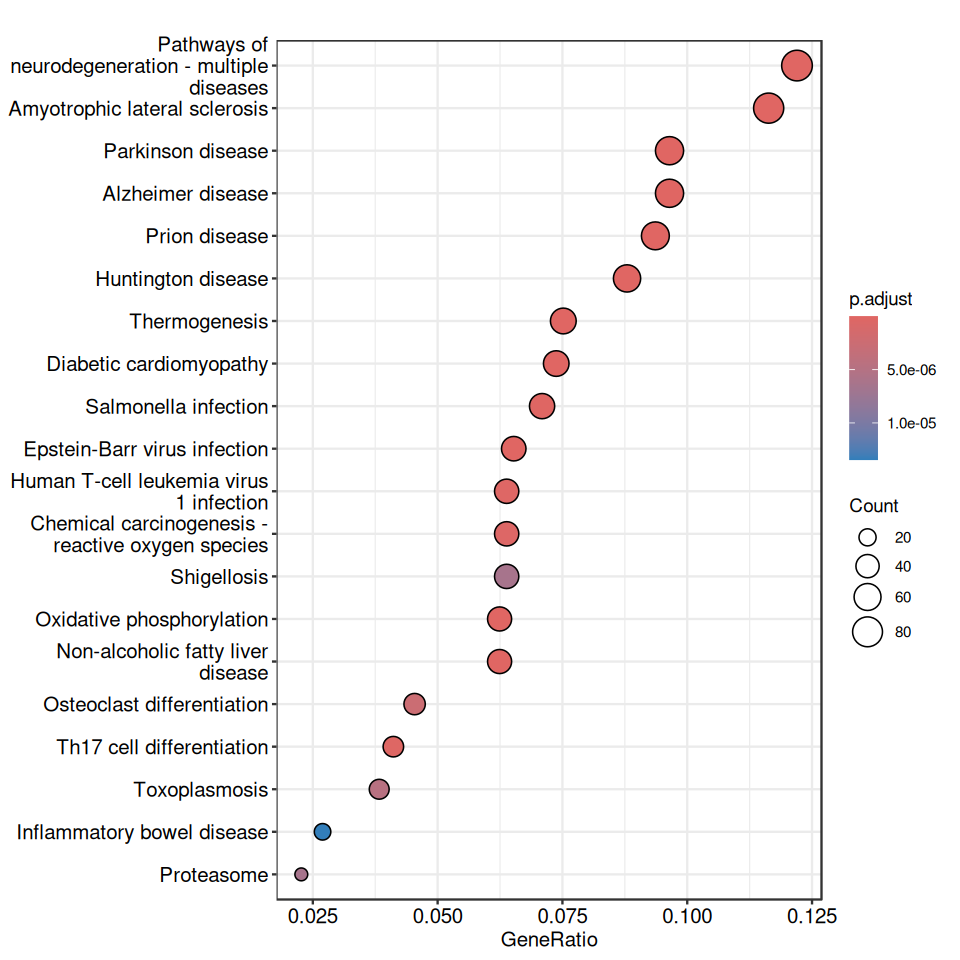

In [49]:
# KEGG Over-Representation Analysis

result <- tryCatch({

  kegg_enrich <- enrichKEGG(gene = gene_ids$ENTREZID,
                            organism = "hsa",  
                            pAdjustMethod = "BH",
                            pvalueCutoff = 0.05)
    
  if (nrow(kegg_enrich@result) > 0) {
    # print(dotplot(kegg_enrich, showCategory = 20))
    write.table(kegg_enrich@result, 
                file = paste0(fin_name, "_KEGG_OverRepresentation_Results.txt"), 
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_KEGG_OverRepresentation_Plot.png"), width = 600, height = 600)
    print(dotplot(kegg_enrich, showCategory = 20))
    dev.off()
    
  } else {
    cat("No enriched KEGG terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during KEGG over-representation analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(kegg_enrich, showCategory = 20))

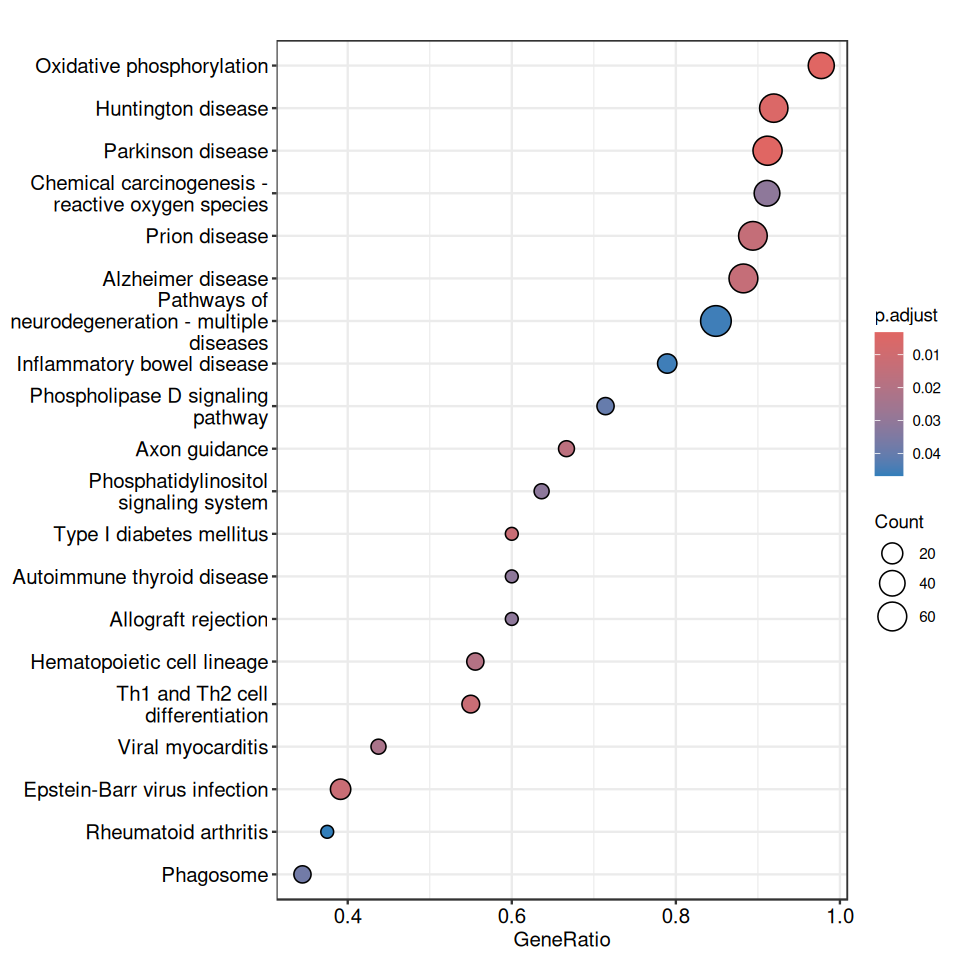

In [50]:
# KEGG Gene Set Enrichment Analysis

result2 <- tryCatch({
    
  kegg_gse <- gseKEGG(geneList   = gene_list2,
                      organism     = 'hsa',
                      minGSSize    = 10,
                      pvalueCutoff = 0.05,
                      verbose      = FALSE)
  
  if (nrow(kegg_gse@result) > 0) {
    # print(dotplot(kegg_gse, showCategory = 20))
    write.table(kegg_gse@result, "KEGG_Enrichment_Results.txt", sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_KEGG_Enrichment_Plot.png"), width = 600, height = 600)
    print(dotplot(kegg_gse, showCategory = 20))
    dev.off()
    
  } else {
    cat("No enriched KEGG terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during KEGG GSEA analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(kegg_gse, showCategory = 20))

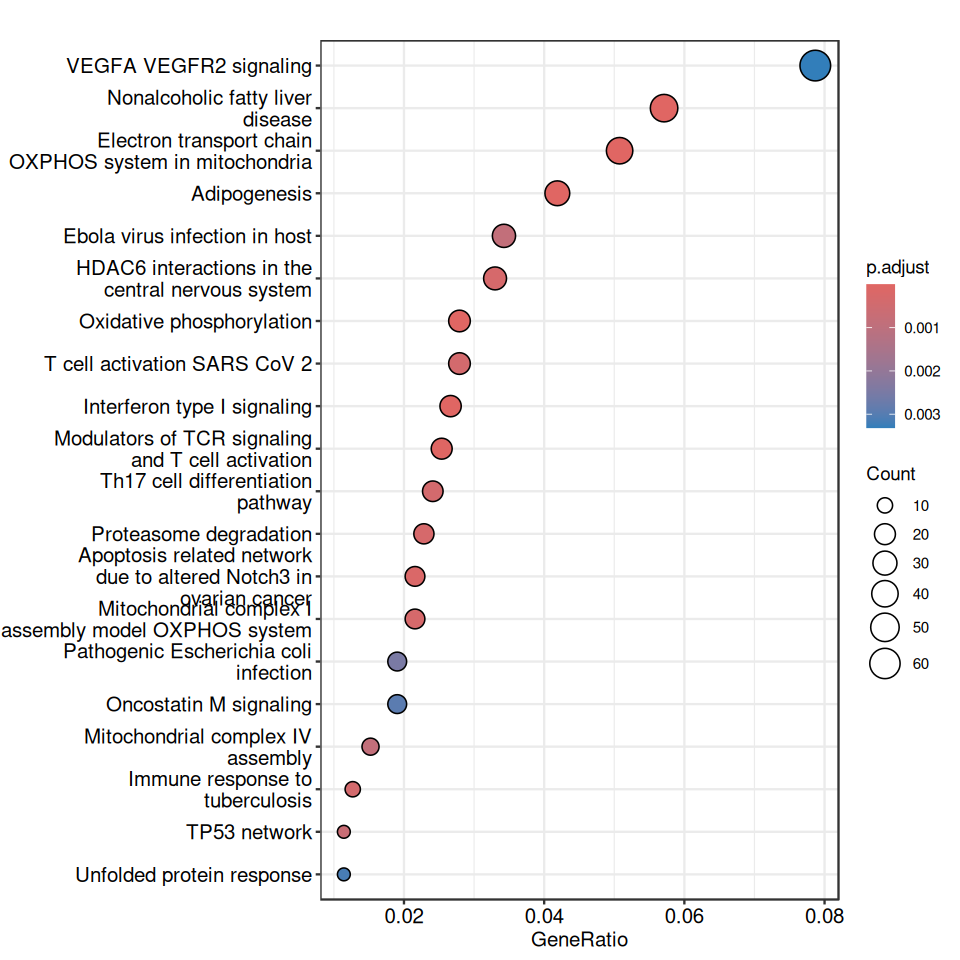

In [51]:
################################################################################ ORA
# WikiPathways Over-Representation Analysis

result <- tryCatch({

  wikipathways_enrich <- enrichWP(
    gene = gene_ids$ENTREZID,
    organism = "Homo sapiens",
    pvalueCutoff = 0.05
  )
  
  if (nrow(wikipathways_enrich@result) > 0) {
    write.table(wikipathways_enrich@result,
                file = paste0(fin_name, "_WikiPathways_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_WikiPathways_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_enrich, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched WikiPathways terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during WikiPathways over-representation analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(wikipathways_enrich, showCategory = 20))

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



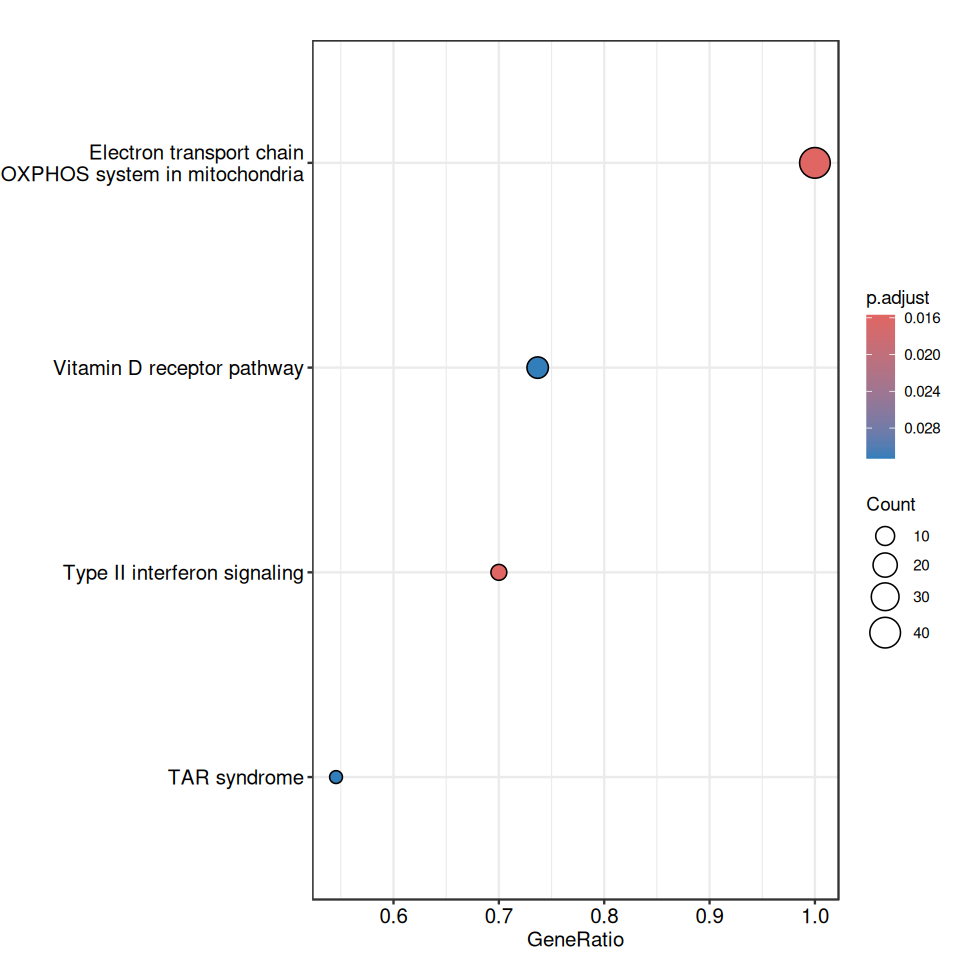

In [52]:
# WikiPathways Gene Set Enrichment Analysis

result2 <- tryCatch({

  wikipathways_gse <- gseWP(
    gene = gene_list2,
    organism = "Homo sapiens",
    pvalueCutoff = 0.05
  )
  
  if (nrow(wikipathways_gse@result) > 0) {
    write.table(wikipathways_gse@result,
                file = paste0(fin_name, "_WikiPathways_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_WikiPathways_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_gse, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched WikiPathways terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during WikiPathways GSEA analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(wikipathways_gse, showCategory = 20))

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



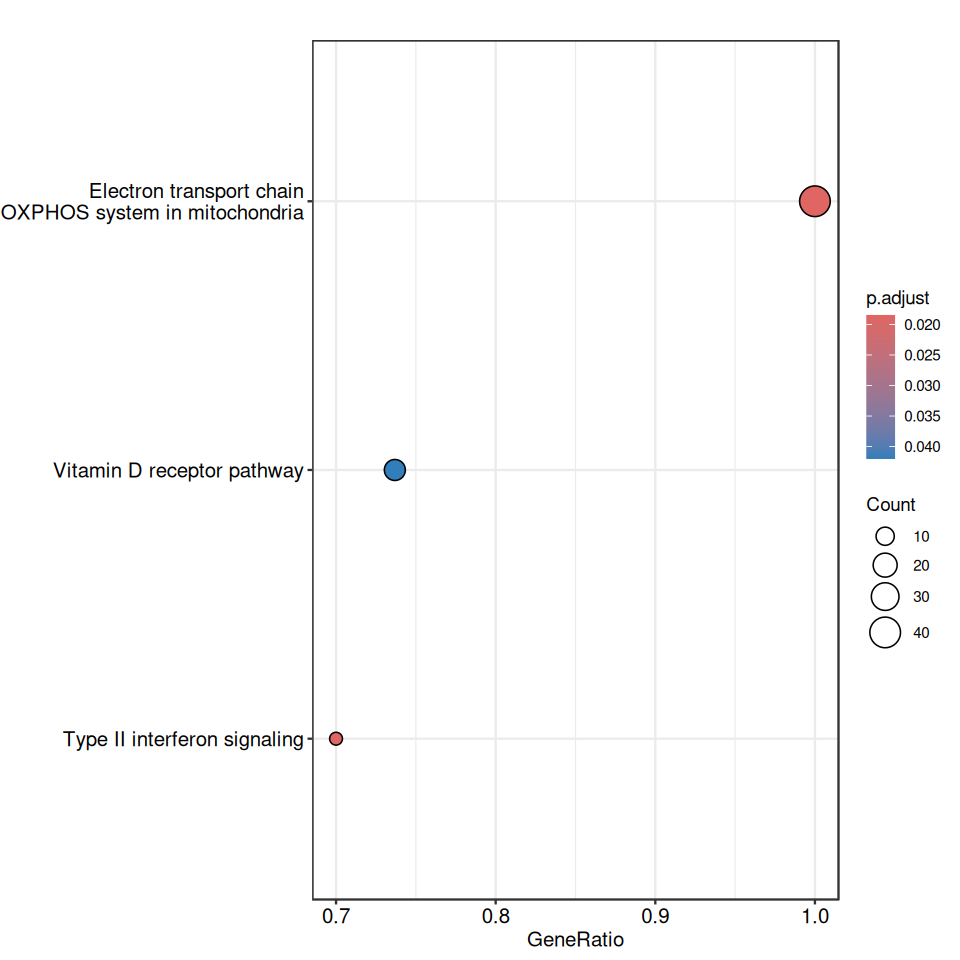

In [53]:
# WikiPathways Gene Set Enrichment Analysis

result2 <- tryCatch({

  wikipathways_gse <- gseWP(
    gene = gene_list2,
    organism = "Homo sapiens",
    pvalueCutoff = 0.05
  )
  
  if (nrow(wikipathways_gse@result) > 0) {
    write.table(wikipathways_gse@result,
                file = paste0(fin_name, "_WikiPathways_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_WikiPathways_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_gse, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched WikiPathways terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during WikiPathways GSEA analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(wikipathways_gse, showCategory = 20))

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



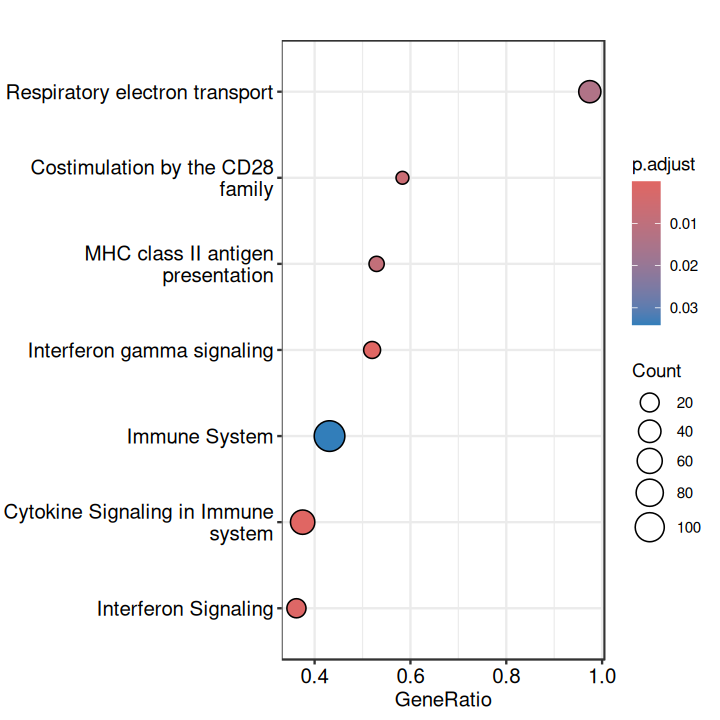

In [54]:
################################################################################ GSEA
# Reactome Gene Set Enrichment Analysis using fgsea

result2 <- tryCatch({

  reactome_gse <- gsePathway(
    gene = gene_list2,
    organism = "human",
    pAdjustMethod = "BH",
    pvalueCutoff = 0.05
  )
  
  if (nrow(reactome_gse@result) > 0) {
    write.table(reactome_gse@result,
                file = paste0(fin_name, "_Reactome_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_Reactome_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_gse, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched Reactome terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during Reactome GSEA analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 6, repr.plot.height = 6)
print(dotplot(reactome_gse, showCategory = 20))

In [55]:
# save.image("cd.v2.RData")